In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 1. Common Functions

In [3]:
def plot_length(s, **kwargs):
    fig, ax = plt.subplots()
    r = range(s.shape[1])
    for k in range(s.shape[0]):
        left_length = 0
        for previous in range(k):
            left_length += s[previous]
        ax.barh(r, s[k], left=left_length, label=k)


def create_dirchlet_matrix(alpha: float,
                            size: int,
                            k: int):
    generator = np.random.default_rng()
    alpha = np.full(k, alpha)
    s = generator.dirichlet(alpha, size)
    return s


def plot_dirchlet_distr(frame):
    fig, axes = plt.subplots(2, 1)
    distribution = frame
    # PLOTS CLIENT'S TRAINING SET
    s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
    r = range(s.shape[1])
    for k in range(s.shape[0]):
        left_length = 0
        for previous in range(k):
            left_length += s[previous]
        axes[0].barh(r, s[k], left=left_length, label=k)
        axes[0].set_yticks([0,1,2,3,4,5,6,7,8,9])
        
    # # PLOTS CLIENT'S & ORCHESTRATOR'S TEST SET
    # s = distribution[distribution['partition'] == 'test_set'].drop(['client_id', 'partition', 'total_samples'], axis=1)
    # o = distribution[distribution['partition'] == 'central_test_set'].drop(['client_id', 'partition', 'total_samples'], axis=1)
    # s = pd.concat([s, o]).to_numpy().T
    # r = range(s.shape[1])
    # for k in range(s.shape[0]):
    #     left_length = 0
    #     for previous in range(k):
    #         left_length += s[previous]
    #     axes[1].barh(r, s[k], left=left_length, label=k)

In [4]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


In [5]:
def visualize_individual_scores(
    root_load : str,
    root_save : str,
    prefix : str
):
    # LOADING FRAMES
    mnist_hom = {
        "loo": pd.read_csv(os.path.join(root_load, f'mnist_10_hom_{prefix}', 'results', 'loo.csv')),
        "alpha": pd.read_csv(os.path.join(root_load, f'mnist_10_hom_{prefix}', 'results', 'alpha.csv'))
        }
    mnist_het = {
        "loo": pd.read_csv(os.path.join(root_load, f'mnist_10_het_{prefix}', 'results', 'loo.csv')),
        "alpha": pd.read_csv(os.path.join(root_load, f'mnist_10_het_{prefix}', 'results', 'alpha.csv'))
        }

    fmnist_hom = {
        "loo": pd.read_csv(os.path.join(root_load, f'fmnist_10_hom_{prefix}', 'results', 'loo.csv')),
        "alpha": pd.read_csv(os.path.join(root_load, f'fmnist_10_hom_{prefix}', 'results', 'alpha.csv'))
        }
    fmnist_het = {
        "loo": pd.read_csv(os.path.join(root_load, f'fmnist_10_het_{prefix}', 'results', 'loo.csv')),
        "alpha": pd.read_csv(os.path.join(root_load, f'fmnist_10_het_{prefix}', 'results', 'alpha.csv'))
        }
    cifar_hom = { 
        "loo": pd.read_csv(os.path.join(root_load, f'cifar_10_hom_{prefix}', 'results', 'loo.csv')),
        "alpha": pd.read_csv(os.path.join(root_load, f'cifar_10_hom_{prefix}', 'results', 'alpha.csv'))
        }
    cifar_het = { 
        "loo": pd.read_csv(os.path.join(root_load, f'cifar_10_het_{prefix}', 'results', 'loo.csv')),
        "alpha": pd.read_csv(os.path.join(root_load, f'cifar_10_het_{prefix}', 'results', 'alpha.csv'))
        }
    
    
    # SETTING THE PLOT PARAMETERS
    l = set_size(width='thesis', fraction=5)
    fig, ax = plt.subplots(3, 4, figsize=l)
    baseline = np.array([0]*10)
    clients = [i for i in range(10)]

    bar_linewidth = 2
    baseline_linewidth = 2
    suptitle_fontsize = 12
    labels_fontsize = 11
    legend_fontsize = 11
    
    
    # PLOTTING
    # MNIST
    # MNIST IID LOO ################################################
    ax[0][0].set_xticks(clients)
    ax[0][0].plot(baseline, 'k-', linewidth = baseline_linewidth)
    ax[0][0].set_title("MNIST (IID) LOO VLAUES", fontsize = suptitle_fontsize)
    ax[0][0].set_ylabel("CONTRIBUTION FUNCTION VALUE", fontsize = labels_fontsize)
    for i in range(5):
        ax[0][0].plot( (clients[i], clients[i]), (baseline[i], mnist_hom['loo'][str(i)].values[0]), 'r-', label=r'Malfunctioning Sensor', linewidth = bar_linewidth)
    for i in range(5, 10):
        ax[0][0].plot( (clients[i], clients[i]), (baseline[i], mnist_hom['loo'][str(i)].values[0]), 'g-', label=r'Valid Sensor', linewidth = bar_linewidth)

    std = [mnist_hom['loo'].std(axis=1).values[0]] * 10
    minus_std = [-mnist_hom['loo'].std(axis=1).values[0]] * 10
    ax[0][0].plot(minus_std, 'k--', linewidth=2)
    handles, labels = ax[0][0].get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax[0][0].legend(*zip(*unique), fontsize=legend_fontsize)
    ################################################

    # MNIST NON-IID LOO ################################################
    ax[0][2].set_xticks(clients)
    ax[0][2].plot(baseline, 'k-', linewidth = baseline_linewidth)
    ax[0][2].set_title("MNIST (NON-IID) LOO VLAUES", fontsize = suptitle_fontsize)
    for i in range(5):
        ax[0][2].plot( (clients[i], clients[i]), (baseline[i], mnist_het['loo'][str(i)].values[0]), 'r-', label=r'Malfunctioning Sensor', linewidth = bar_linewidth)
    for i in range(5, 10):
        ax[0][2].plot( (clients[i], clients[i]), (baseline[i], mnist_het['loo'][str(i)].values[0]), 'g-', label=r'Valid Sensor', linewidth = bar_linewidth)

    std = [mnist_het['loo'].std(axis=1).values[0]] * 10
    minus_std = [-mnist_het['loo'].std(axis=1).values[0]] * 10
    ax[0][2].plot(minus_std, 'k--', linewidth=2)
    ################################################

    # MNIST IID ALPHA ################################################
    ax[0][1].set_xticks(clients)
    ax[0][1].plot(baseline, 'k-', linewidth = baseline_linewidth)
    ax[0][1].set_title("MNIST (IID) ALPHA VLAUES", fontsize = suptitle_fontsize)
    for i in range(5):
        ax[0][1].plot( (clients[i], clients[i]), (baseline[i], mnist_hom['alpha'][str(i)].values[0]), 'r-', label=r'Malfunctioning Sensor', linewidth = bar_linewidth)
    for i in range(5, 10):
        ax[0][1].plot( (clients[i], clients[i]), (baseline[i], mnist_hom['alpha'][str(i)].values[0]), 'g-', label=r'Valid Sensor', linewidth = bar_linewidth)

    std = [mnist_hom['alpha'].std(axis=1).values[0]] * 10
    minus_std = [-mnist_hom['alpha'].std(axis=1).values[0]] * 10
    ax[0][1].plot(std, "k--", linewidth=2)
    ################################################

    # MNIST NON-IDD ALPHA ################################################
    ax[0][3].set_xticks(clients)
    ax[0][3].plot(baseline, 'k-', linewidth = baseline_linewidth)
    ax[0][3].set_title("MNIST (NON-IID) ALPHA VLAUES", fontsize = suptitle_fontsize)
    for i in range(5):
        ax[0][3].plot( (clients[i], clients[i]), (baseline[i], mnist_het['alpha'][str(i)].values[0]), 'r-', label=r'Malfunctioning Sensor', linewidth = bar_linewidth)
    for i in range(5, 10):
        ax[0][3].plot( (clients[i], clients[i]), (baseline[i], mnist_het['alpha'][str(i)].values[0]), 'g-', label=r'Valid Sensor', linewidth = bar_linewidth)

    std = [mnist_het['alpha'].std(axis=1).values[0]] * 10
    minus_std = [-mnist_het['alpha'].std(axis=1).values[0]] * 10
    ax[0][3].plot(std, "k--", linewidth=2)
    ################################################


    # FMNIST
    # FMNIST IID LOO ################################################
    ax[1][0].set_xticks(clients)
    ax[1][0].plot(baseline, 'k-', linewidth = baseline_linewidth)
    ax[1][0].set_title("FMNIST (IID) LOO VLAUES", fontsize = suptitle_fontsize)
    ax[1][0].set_ylabel("CONTRIBUTION VALUE", fontsize = labels_fontsize)
    for i in range(5):
        ax[1][0].plot( (clients[i], clients[i]), (baseline[i], fmnist_hom['loo'][str(i)].values[0]), 'r-', label=r'Malfunctioning Sensor', linewidth = bar_linewidth)
    for i in range(5, 10):
        ax[1][0].plot( (clients[i], clients[i]), (baseline[i], fmnist_hom['loo'][str(i)].values[0]), 'g-', label=r'Valid Sensor', linewidth = bar_linewidth)

    std = [fmnist_hom['loo'].std(axis=1).values[0]] * 10
    minus_std = [-fmnist_hom['loo'].std(axis=1).values[0]] * 10
    ax[1][0].plot(minus_std, 'k--', linewidth=2)
    handles, labels = ax[1][0].get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax[1][0].legend(*zip(*unique), fontsize=legend_fontsize)
    ################################################

    # FMNIST NON-IID LOO ################################################
    ax[1][2].set_xticks(clients)
    ax[1][2].plot(baseline, 'k-', linewidth = baseline_linewidth)
    ax[1][2].set_title("FMNIST (NON-IID) LOO VLAUES", fontsize = suptitle_fontsize)
    for i in range(5):
        ax[1][2].plot( (clients[i], clients[i]), (baseline[i], fmnist_het['loo'][str(i)].values[0]), 'r-', label=r'Malfunctioning Sensor', linewidth = bar_linewidth)
    for i in range(5, 10):
        ax[1][2].plot( (clients[i], clients[i]), (baseline[i], fmnist_het['loo'][str(i)].values[0]), 'g-', label=r'Valid Sensor', linewidth = bar_linewidth)

    std = [fmnist_het['loo'].std(axis=1).values[0]] * 10
    minus_std = [-fmnist_het['loo'].std(axis=1).values[0]] * 10
    ax[1][2].plot(minus_std, 'k--', linewidth=2)
    ################################################

    # FMNIST IID ALPHA ################################################
    ax[1][1].set_xticks(clients)
    ax[1][1].plot(baseline, 'k-', linewidth = baseline_linewidth)
    ax[1][1].set_title("FMNIST (IID) ALPHA VLAUES", fontsize = suptitle_fontsize)
    for i in range(5):
        ax[1][1].plot( (clients[i], clients[i]), (baseline[i], fmnist_hom['alpha'][str(i)].values[0]), 'r-', label=r'Malfunctioning Sensor', linewidth = bar_linewidth)
    for i in range(5, 10):
        ax[1][1].plot( (clients[i], clients[i]), (baseline[i], fmnist_hom['alpha'][str(i)].values[0]), 'g-', label=r'Valid Sensor', linewidth = bar_linewidth)

    std = [fmnist_hom['alpha'].std(axis=1).values[0]] * 10
    minus_std = [-fmnist_hom['alpha'].std(axis=1).values[0]] * 10
    ax[1][1].plot(std, "k--", linewidth=2)
    ################################################

    # FMNIST NON-IID ALPHA ################################################
    ax[1][3].set_xticks(clients)
    ax[1][3].plot(baseline, 'k-', linewidth = baseline_linewidth)
    ax[1][3].set_title("FMNIST (NON-IID) ALPHA VLAUES", fontsize = suptitle_fontsize)
    for i in range(5):
        ax[1][3].plot( (clients[i], clients[i]), (baseline[i], fmnist_het['alpha'][str(i)].values[0]), 'r-', label=r'Malfunctioning Sensor', linewidth = bar_linewidth)
    for i in range(5, 10):
        ax[1][3].plot( (clients[i], clients[i]), (baseline[i], fmnist_het['alpha'][str(i)].values[0]), 'g-', label=r'Valid Sensor', linewidth = bar_linewidth)

    std = [fmnist_het['alpha'].std(axis=1).values[0]] * 10
    minus_std = [-fmnist_het['alpha'].std(axis=1).values[0]] * 10
    ax[1][3].plot(std, 'k--', linewidth=2)
    ################################################


    # CIFAR
    # CIFAR IID LOO ################################################
    ax[2][0].set_xticks(clients)
    ax[2][0].plot(baseline, 'k-', linewidth = baseline_linewidth)
    ax[2][0].set_title("CIFAR (IID) LOO VLAUES", fontsize = suptitle_fontsize)
    ax[2][0].set_xlabel('CLIENT ID', fontsize = labels_fontsize)
    ax[2][0].set_ylabel("CONTRIBUTION VALUE", fontsize = labels_fontsize)
    for i in range(5):
        ax[2][0].plot( (clients[i], clients[i]), (baseline[i], cifar_hom['loo'][str(i)].values[0]), 'r-', label=r'Malfunctioning Sensor', linewidth =  bar_linewidth)
    for i in range(5, 10):
        ax[2][0].plot( (clients[i], clients[i]), (baseline[i], cifar_hom['loo'][str(i)].values[0]), 'g-', label=r'Valid Sensor', linewidth = bar_linewidth)

    std = [cifar_hom['loo'].std(axis=1).values[0]] * 10
    minus_std = [-cifar_hom['loo'].std(axis=1).values[0]] * 10
    ax[2][0].plot(minus_std, 'k--', linewidth=2)
    handles, labels = ax[2][0].get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax[2][0].legend(*zip(*unique), fontsize=legend_fontsize)
    ################################################

    # CIFAR NON-IID ALPHA ################################################
    ax[2][2].set_xticks(clients)
    ax[2][2].plot(baseline, 'k-', linewidth = baseline_linewidth)
    ax[2][2].set_title("CIFAR (NON-IID) LOO VLAUES", fontsize = suptitle_fontsize)
    ax[2][2].set_xlabel('CLIENT ID', fontsize = labels_fontsize)
    for i in range(5):
        ax[2][2].plot( (clients[i], clients[i]), (baseline[i], cifar_het['loo'][str(i)].values[0]), 'r-', label=r'Malfunctioning Sensor', linewidth = bar_linewidth)
    for i in range(5, 10):
        ax[2][2].plot( (clients[i], clients[i]), (baseline[i], cifar_het['loo'][str(i)].values[0]), 'g-', label=r'Valid Sensor', linewidth = bar_linewidth)

    std = [cifar_het['loo'].std(axis=1).values[0]] * 10
    minus_std = [-cifar_het['loo'].std(axis=1).values[0]] * 10
    ax[2][2].plot(minus_std, 'k--', linewidth=2)
    ################################################

    # CIFAR IID ALPHA ################################################
    ax[2][1].set_xticks(clients)
    ax[2][1].plot(baseline, 'k-', linewidth = baseline_linewidth)
    ax[2][1].set_title("CIFAR (IID) ALPHA VLAUES", fontsize = suptitle_fontsize)
    ax[2][1].set_xlabel('CLIENT ID', fontsize = labels_fontsize)
    for i in range(5):
        ax[2][1].plot( (clients[i], clients[i]), (baseline[i], cifar_hom['alpha'][str(i)].values[0]), 'r-', label=r'Malfunctioning Sensor', linewidth = bar_linewidth)
    for i in range(5, 10):
        ax[2][1].plot( (clients[i], clients[i]), (baseline[i], cifar_hom['alpha'][str(i)].values[0]), 'g-', label=r'Valid Sensor', linewidth = bar_linewidth)

    std = [cifar_hom['alpha'].std(axis=1).values[0]] * 10
    minus_std = [-cifar_hom['alpha'].std(axis=1).values[0]] * 10
    ax[2][1].plot(std, "k--", linewidth=2)
    ################################################

    # CIFAR NON-IDD ALPHA ################################################
    ax[2][3].set_xticks(clients)
    ax[2][3].plot(baseline, 'k-', linewidth = 3)
    ax[2][3].set_title("CIFAR (NON-IID) ALPHA VLAUES", fontsize = suptitle_fontsize)
    ax[2][3].set_xlabel('CLIENT ID', fontsize = labels_fontsize)
    for i in range(5):
        ax[2][3].plot( (clients[i], clients[i]), (baseline[i], cifar_het['alpha'][str(i)].values[0]), 'r-', label=r'Malfunctioning Sensor', linewidth = bar_linewidth)
    for i in range(5, 10):
        ax[2][3].plot( (clients[i], clients[i]), (baseline[i], cifar_het['alpha'][str(i)].values[0]), 'g-', label=r'Valid Sensor', linewidth = bar_linewidth)

    std = [cifar_het['alpha'].std(axis=1).values[0]] * 10
    minus_std = [-cifar_het['alpha'].std(axis=1).values[0]] * 10
    ax[2][3].plot(std, "k--", linewidth=2)
    ################################################
    plt.tight_layout()
    with open(os.path.join(root_save, f'average_value_of_{prefix}.png'), 'wb') as file:
        plt.savefig(file, pad_inches=0.0)

In [6]:
def visualize_aggregated_scores(
    data_struct : pd.DataFrame,
    root_save : str,
):
    mnist_hom = data_struct['mnist_hom']
    mnist_het = data_struct['mnist_het']
    fmnist_hom = data_struct['fmnist_hom']
    fmnist_het = data_struct['fmnist_het']
    cifar_hom = data_struct['cifar_hom']
    cifar_het = data_struct['cifar_het']
    
    # SETTING THE PLOT PARAMETERS
    l = (14, 20)
    fig, ax = plt.subplots(3, 4, figsize=l)
    baseline = np.array([0]*10)
    clients = [i for i in range(10)]

    bar_linewidth = 2
    baseline_linewidth = 2
    suptitle_fontsize = 12
    labels_fontsize = 11
    legend_fontsize = 11
    
    
    # PLOTTING
    # MNIST
    # MNIST IID LOO ################################################
    ax[0][0].set_xticks(clients)
    ax[0][0].plot(baseline, 'k-', linewidth = baseline_linewidth)
    ax[0][0].set_title("MNIST (IID) LOO VLAUES", fontsize = suptitle_fontsize)
    ax[0][0].set_ylabel("CONTRIBUTION FUNCTION VALUE", fontsize = labels_fontsize)
    for i in range(5):
        ax[0][0].plot( (clients[i], clients[i]), (baseline[i], mnist_hom['loo'][i]), 'r-', label=r'Malfunctioning Sensor', linewidth = bar_linewidth)
    for i in range(5, 10):
        ax[0][0].plot( (clients[i], clients[i]), (baseline[i], mnist_hom['loo'][i]), 'g-', label=r'Valid Sensor', linewidth = bar_linewidth)

    std = [mnist_hom['loo'].std()] * 10
    minus_std = [-mnist_hom['loo'].std()] * 10
    ax[0][0].plot(minus_std, 'k--', linewidth=2)
    handles, labels = ax[0][0].get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax[0][0].legend(*zip(*unique), fontsize=legend_fontsize)
    ################################################

    # MNIST NON-IID LOO ################################################
    ax[0][2].set_xticks(clients)
    ax[0][2].plot(baseline, 'k-', linewidth = baseline_linewidth)
    ax[0][2].set_title("MNIST (NON-IID) LOO VLAUES", fontsize = suptitle_fontsize)
    for i in range(5):
        ax[0][2].plot( (clients[i], clients[i]), (baseline[i], mnist_het['loo'][i]), 'r-', label=r'Malfunctioning Sensor', linewidth = bar_linewidth)
    for i in range(5, 10):
        ax[0][2].plot( (clients[i], clients[i]), (baseline[i], mnist_het['loo'][i]), 'g-', label=r'Valid Sensor', linewidth = bar_linewidth)

    std = [mnist_het['loo'].std()] * 10
    minus_std = [-mnist_het['loo'].std()] * 10
    ax[0][2].plot(minus_std, 'k--', linewidth=2)
    ################################################

    # MNIST IID ALPHA ################################################
    ax[0][1].set_xticks(clients)
    ax[0][1].plot(baseline, 'k-', linewidth = baseline_linewidth)
    ax[0][1].set_title("MNIST (IID) ALPHA VLAUES", fontsize = suptitle_fontsize)
    for i in range(5):
        ax[0][1].plot( (clients[i], clients[i]), (baseline[i], mnist_hom['alpha'][i]), 'r-', label=r'Malfunctioning Sensor', linewidth = bar_linewidth)
    for i in range(5, 10):
        ax[0][1].plot( (clients[i], clients[i]), (baseline[i], mnist_hom['alpha'][i]), 'g-', label=r'Valid Sensor', linewidth = bar_linewidth)

    std = [mnist_hom['alpha'].std()] * 10
    minus_std = [-mnist_hom['alpha'].std()] * 10
    ax[0][1].plot(std, "k--", linewidth=2)
    ################################################

    # MNIST NON-IDD ALPHA ################################################
    ax[0][3].set_xticks(clients)
    ax[0][3].plot(baseline, 'k-', linewidth = baseline_linewidth)
    ax[0][3].set_title("MNIST (NON-IID) ALPHA VLAUES", fontsize = suptitle_fontsize)
    for i in range(5):
        ax[0][3].plot( (clients[i], clients[i]), (baseline[i], mnist_het['alpha'][i]), 'r-', label=r'Malfunctioning Sensor', linewidth = bar_linewidth)
    for i in range(5, 10):
        ax[0][3].plot( (clients[i], clients[i]), (baseline[i], mnist_het['alpha'][i]), 'g-', label=r'Valid Sensor', linewidth = bar_linewidth)

    std = [mnist_het['alpha'].std()] * 10
    minus_std = [-mnist_het['alpha'].std()] * 10
    ax[0][3].plot(std, "k--", linewidth=2)
    ################################################


    # FMNIST
    # FMNIST IID LOO ################################################
    ax[1][0].set_xticks(clients)
    ax[1][0].plot(baseline, 'k-', linewidth = baseline_linewidth)
    ax[1][0].set_title("FMNIST (IID) LOO VLAUES", fontsize = suptitle_fontsize)
    ax[1][0].set_ylabel("CONTRIBUTION VALUE", fontsize = labels_fontsize)
    for i in range(5):
        ax[1][0].plot( (clients[i], clients[i]), (baseline[i], fmnist_hom['loo'][i]), 'r-', label=r'Malfunctioning Sensor', linewidth = bar_linewidth)
    for i in range(5, 10):
        ax[1][0].plot( (clients[i], clients[i]), (baseline[i], fmnist_hom['loo'][i]), 'g-', label=r'Valid Sensor', linewidth = bar_linewidth)

    std = [fmnist_hom['loo'].std()] * 10
    minus_std = [-fmnist_hom['loo'].std()] * 10
    ax[1][0].plot(minus_std, 'k--', linewidth=2)
    handles, labels = ax[1][0].get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax[1][0].legend(*zip(*unique), fontsize=legend_fontsize)
    ################################################

    # FMNIST NON-IID LOO ################################################
    ax[1][2].set_xticks(clients)
    ax[1][2].plot(baseline, 'k-', linewidth = baseline_linewidth)
    ax[1][2].set_title("FMNIST (NON-IID) LOO VLAUES", fontsize = suptitle_fontsize)
    for i in range(5):
        ax[1][2].plot( (clients[i], clients[i]), (baseline[i], fmnist_het['loo'][i]), 'r-', label=r'Malfunctioning Sensor', linewidth = bar_linewidth)
    for i in range(5, 10):
        ax[1][2].plot( (clients[i], clients[i]), (baseline[i], fmnist_het['loo'][i]), 'g-', label=r'Valid Sensor', linewidth = bar_linewidth)

    std = [fmnist_het['loo'].std()] * 10
    minus_std = [-fmnist_het['loo'].std()] * 10
    ax[1][2].plot(minus_std, 'k--', linewidth=2)
    ################################################

    # FMNIST IID ALPHA ################################################
    ax[1][1].set_xticks(clients)
    ax[1][1].plot(baseline, 'k-', linewidth = baseline_linewidth)
    ax[1][1].set_title("FMNIST (IID) ALPHA VLAUES", fontsize = suptitle_fontsize)
    for i in range(5):
        ax[1][1].plot( (clients[i], clients[i]), (baseline[i], fmnist_hom['alpha'][i]), 'r-', label=r'Malfunctioning Sensor', linewidth = bar_linewidth)
    for i in range(5, 10):
        ax[1][1].plot( (clients[i], clients[i]), (baseline[i], fmnist_hom['alpha'][i]), 'g-', label=r'Valid Sensor', linewidth = bar_linewidth)

    std = [fmnist_hom['alpha'].std()] * 10
    minus_std = [-fmnist_hom['alpha'].std()] * 10
    ax[1][1].plot(std, "k--", linewidth=2)
    ################################################

    # FMNIST NON-IID ALPHA ################################################
    ax[1][3].set_xticks(clients)
    ax[1][3].plot(baseline, 'k-', linewidth = baseline_linewidth)
    ax[1][3].set_title("FMNIST (NON-IID) ALPHA VLAUES", fontsize = suptitle_fontsize)
    for i in range(5):
        ax[1][3].plot( (clients[i], clients[i]), (baseline[i], fmnist_het['alpha'][i]), 'r-', label=r'Malfunctioning Sensor', linewidth = bar_linewidth)
    for i in range(5, 10):
        ax[1][3].plot( (clients[i], clients[i]), (baseline[i], fmnist_het['alpha'][i]), 'g-', label=r'Valid Sensor', linewidth = bar_linewidth)

    std = [fmnist_het['alpha'].std()] * 10
    minus_std = [-fmnist_het['alpha'].std()] * 10
    ax[1][3].plot(std, 'k--', linewidth=2)
    ################################################


    # CIFAR
    # CIFAR IID LOO ################################################
    ax[2][0].set_xticks(clients)
    ax[2][0].plot(baseline, 'k-', linewidth = baseline_linewidth)
    ax[2][0].set_title("CIFAR (IID) LOO VLAUES", fontsize = suptitle_fontsize)
    ax[2][0].set_xlabel('CLIENT ID', fontsize = labels_fontsize)
    ax[2][0].set_ylabel("CONTRIBUTION VALUE", fontsize = labels_fontsize)
    for i in range(5):
        ax[2][0].plot( (clients[i], clients[i]), (baseline[i], cifar_hom['loo'][i]), 'r-', label=r'Malfunctioning Sensor', linewidth =  bar_linewidth)
    for i in range(5, 10):
        ax[2][0].plot( (clients[i], clients[i]), (baseline[i], cifar_hom['loo'][i]), 'g-', label=r'Valid Sensor', linewidth = bar_linewidth)

    std = [cifar_hom['loo'].std()] * 10
    minus_std = [-cifar_hom['loo'].std()] * 10
    ax[2][0].plot(minus_std, 'k--', linewidth=2)
    handles, labels = ax[2][0].get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax[2][0].legend(*zip(*unique), fontsize=legend_fontsize)
    ################################################

    # CIFAR NON-IID ALPHA ################################################
    ax[2][2].set_xticks(clients)
    ax[2][2].plot(baseline, 'k-', linewidth = baseline_linewidth)
    ax[2][2].set_title("CIFAR (NON-IID) LOO VLAUES", fontsize = suptitle_fontsize)
    ax[2][2].set_xlabel('CLIENT ID', fontsize = labels_fontsize)
    for i in range(5):
        ax[2][2].plot( (clients[i], clients[i]), (baseline[i], cifar_het['loo'][i]), 'r-', label=r'Malfunctioning Sensor', linewidth = bar_linewidth)
    for i in range(5, 10):
        ax[2][2].plot( (clients[i], clients[i]), (baseline[i], cifar_het['loo'][i]), 'g-', label=r'Valid Sensor', linewidth = bar_linewidth)

    std = [cifar_het['loo'].std()] * 10
    minus_std = [-cifar_het['loo'].std()] * 10
    ax[2][2].plot(minus_std, 'k--', linewidth=2)
    ################################################

    # CIFAR IID ALPHA ################################################
    ax[2][1].set_xticks(clients)
    ax[2][1].plot(baseline, 'k-', linewidth = baseline_linewidth)
    ax[2][1].set_title("CIFAR (IID) ALPHA VLAUES", fontsize = suptitle_fontsize)
    ax[2][1].set_xlabel('CLIENT ID', fontsize = labels_fontsize)
    for i in range(5):
        ax[2][1].plot( (clients[i], clients[i]), (baseline[i], cifar_hom['alpha'][i]), 'r-', label=r'Malfunctioning Sensor', linewidth = bar_linewidth)
    for i in range(5, 10):
        ax[2][1].plot( (clients[i], clients[i]), (baseline[i], cifar_hom['alpha'][i]), 'g-', label=r'Valid Sensor', linewidth = bar_linewidth)

    std = [cifar_hom['alpha'].std()] * 10
    minus_std = [-cifar_hom['alpha'].std()] * 10
    ax[2][1].plot(std, "k--", linewidth=2)
    ################################################

    # CIFAR NON-IDD ALPHA ################################################
    ax[2][3].set_xticks(clients)
    ax[2][3].plot(baseline, 'k-', linewidth = 3)
    ax[2][3].set_title("CIFAR (NON-IID) ALPHA VLAUES", fontsize = suptitle_fontsize)
    ax[2][3].set_xlabel('CLIENT ID', fontsize = labels_fontsize)
    for i in range(5):
        ax[2][3].plot( (clients[i], clients[i]), (baseline[i], cifar_het['alpha'][i]), 'r-', label=r'Malfunctioning Sensor', linewidth = bar_linewidth)
    for i in range(5, 10):
        ax[2][3].plot( (clients[i], clients[i]), (baseline[i], cifar_het['alpha'][i]), 'g-', label=r'Valid Sensor', linewidth = bar_linewidth)

    std = [cifar_het['alpha'].std()] * 10
    minus_std = [-cifar_het['alpha'].std()] * 10
    ax[2][3].plot(std, "k--", linewidth=2)
    ################################################

    with open(os.path.join(root_save, f'average_value_of_aggregated.png'), 'wb') as file:
        plt.savefig(file, pad_inches=0.0)

In [7]:
def preserve_individual_scores(
    root_load : str,
    root_save : str,
    prefix : str
):
    # LOADING FRAMES
    mnist_hom = {
        "loo": pd.read_csv(os.path.join(root_load, f'mnist_10_hom_{prefix}', 'results', 'loo.csv')),
        "alpha": pd.read_csv(os.path.join(root_load, f'mnist_10_hom_{prefix}', 'results', 'alpha.csv'))
        }
    mnist_het = {
        "loo": pd.read_csv(os.path.join(root_load, f'mnist_10_het_{prefix}', 'results', 'loo.csv')),
        "alpha": pd.read_csv(os.path.join(root_load, f'mnist_10_het_{prefix}', 'results', 'alpha.csv'))
        }

    fmnist_hom = {
        "loo": pd.read_csv(os.path.join(root_load, f'fmnist_10_hom_{prefix}', 'results', 'loo.csv')),
        "alpha": pd.read_csv(os.path.join(root_load, f'fmnist_10_hom_{prefix}', 'results', 'alpha.csv'))
        }
    fmnist_het = {
        "loo": pd.read_csv(os.path.join(root_load, f'fmnist_10_het_{prefix}', 'results', 'loo.csv')),
        "alpha": pd.read_csv(os.path.join(root_load, f'fmnist_10_het_{prefix}', 'results', 'alpha.csv'))
        }
    cifar_hom = { 
        "loo": pd.read_csv(os.path.join(root_load, f'cifar_10_hom_{prefix}', 'results', 'loo.csv')),
        "alpha": pd.read_csv(os.path.join(root_load, f'cifar_10_hom_{prefix}', 'results', 'alpha.csv'))
        }
    cifar_het = { 
        "loo": pd.read_csv(os.path.join(root_load, f'cifar_10_het_{prefix}', 'results', 'loo.csv')),
        "alpha": pd.read_csv(os.path.join(root_load, f'cifar_10_het_{prefix}', 'results', 'alpha.csv'))
        }

    with open(os.path.join(root_save, f'mnist_hom_loo_of_aggregated.tex'), 'w') as file:
        file.write(mnist_hom["loo"].to_latex())
    with open(os.path.join(root_save, f'mnist_hom_alpha_of_aggregated.tex'), 'w') as file:
        file.write(mnist_hom["alpha"].to_latex())
        
    with open(os.path.join(root_save, f'mnist_het_loo_of_aggregated.tex'), 'w') as file:
        file.write(mnist_het["loo"].to_latex())
    with open(os.path.join(root_save, f'mnist_het_alpha_of_aggregated.tex'), 'w') as file:
        file.write(mnist_het["alpha"].to_latex())

    with open(os.path.join(root_save, f'fmnist_hom_loo_of_aggregated.tex'), 'w') as file:
        file.write(fmnist_hom["loo"].to_latex())
    with open(os.path.join(root_save, f'fmnist_hom_alpha_of_aggregated.tex'), 'w') as file:
        file.write(fmnist_hom["alpha"].to_latex())

    with open(os.path.join(root_save, f'fmnist_het_loo_of_aggregated.tex'), 'w') as file:
        file.write(fmnist_het["loo"].to_latex())
    with open(os.path.join(root_save, f'fmnist_het_alpha_of_aggregated.tex'), 'w') as file:
        file.write(fmnist_het["alpha"].to_latex())

    with open(os.path.join(root_save, f'cifar_hom_loo_of_aggregated.tex'), 'w') as file:
        file.write(cifar_hom["loo"].to_latex())
    with open(os.path.join(root_save, f'cifar_hom_alpha_of_aggregated.tex'), 'w') as file:
        file.write(cifar_hom["alpha"].to_latex())

    with open(os.path.join(root_save, f'cifar_het_loo_of_aggregated.tex'), 'w') as file:
        file.write(cifar_hom["loo"].to_latex())
    with open(os.path.join(root_save, f'cifar_het_alpha_of_aggregated.tex'), 'w') as file:
        file.write(cifar_het["alpha"].to_latex())

In [8]:
def preserve_individual_scores_from_struct(
    data_struct : pd.DataFrame,
    root_save : str,
):
    # LOADING FRAMES
    mnist_hom = data_struct['mnist_hom']
    mnist_het = data_struct['mnist_het']
    fmnist_hom = data_struct['fmnist_hom']
    fmnist_het = data_struct['fmnist_het']
    cifar_hom = data_struct['cifar_hom']
    cifar_het = data_struct['cifar_het']

    with open(os.path.join(root_save, f'mnist_hom_loo_of_aggregated.tex'), 'w') as file:
        file.write(mnist_hom["loo"].to_latex())
    with open(os.path.join(root_save, f'mnist_hom_alpha_of_aggregated.tex'), 'w') as file:
        file.write(mnist_hom["alpha"].to_latex())
        
    with open(os.path.join(root_save, f'mnist_het_loo_of_aggregated.tex'), 'w') as file:
        file.write(mnist_het["loo"].to_latex())
    with open(os.path.join(root_save, f'mnist_het_alpha_of_aggregated.tex'), 'w') as file:
        file.write(mnist_het["alpha"].to_latex())

    with open(os.path.join(root_save, f'fmnist_hom_loo_of_aggregated.tex'), 'w') as file:
        file.write(fmnist_hom["loo"].to_latex())
    with open(os.path.join(root_save, f'fmnist_hom_alpha_of_aggregated.tex'), 'w') as file:
        file.write(fmnist_hom["alpha"].to_latex())

    with open(os.path.join(root_save, f'fmnist_het_loo_of_aggregated.tex'), 'w') as file:
        file.write(fmnist_het["loo"].to_latex())
    with open(os.path.join(root_save, f'fmnist_het_alpha_of_aggregated.tex'), 'w') as file:
        file.write(fmnist_het["alpha"].to_latex())

    with open(os.path.join(root_save, f'cifar_hom_loo_of_aggregated.tex'), 'w') as file:
        file.write(cifar_hom["loo"].to_latex())
    with open(os.path.join(root_save, f'cifar_hom_alpha_of_aggregated.tex'), 'w') as file:
        file.write(cifar_hom["alpha"].to_latex())

    with open(os.path.join(root_save, f'cifar_het_loo_of_aggregated.tex'), 'w') as file:
        file.write(cifar_hom["loo"].to_latex())
    with open(os.path.join(root_save, f'cifar_het_alpha_of_aggregated.tex'), 'w') as file:
        file.write(cifar_het["alpha"].to_latex())

In [9]:
def visualize_individual_progression(
    root_load : str,
    root_save : str,
    prefix : str
):
    # LOADING FRAMES
    mnist_hom = {
        "loo": pd.read_csv(os.path.join(root_load, f'mnist_10_hom_{prefix}', 'results', 'partial_loo.csv')),
        "alpha": pd.read_csv(os.path.join(root_load, f'mnist_10_hom_{prefix}', 'results', 'partial_alpha.csv'))
        }
    mnist_het = {
        "loo": pd.read_csv(os.path.join(root_load, f'mnist_10_het_{prefix}', 'results', 'partial_loo.csv')),
        "alpha": pd.read_csv(os.path.join(root_load, f'mnist_10_het_{prefix}', 'results', 'partial_alpha.csv'))
        }

    fmnist_hom = {
        "loo": pd.read_csv(os.path.join(root_load, f'fmnist_10_hom_{prefix}', 'results', 'partial_loo.csv')),
        "alpha": pd.read_csv(os.path.join(root_load, f'fmnist_10_hom_{prefix}', 'results', 'partial_alpha.csv'))
        }
    fmnist_het = {
        "loo": pd.read_csv(os.path.join(root_load, f'fmnist_10_het_{prefix}', 'results', 'partial_loo.csv')),
        "alpha": pd.read_csv(os.path.join(root_load, f'fmnist_10_het_{prefix}', 'results', 'partial_alpha.csv'))
        }
    cifar_hom = { 
        "loo": pd.read_csv(os.path.join(root_load, f'cifar_10_hom_{prefix}', 'results', 'partial_loo.csv')),
        "alpha": pd.read_csv(os.path.join(root_load, f'cifar_10_hom_{prefix}', 'results', 'partial_alpha.csv'))
        }
    cifar_het = { 
        "loo": pd.read_csv(os.path.join(root_load, f'cifar_10_het_{prefix}', 'results', 'partial_loo.csv')),
        "alpha": pd.read_csv(os.path.join(root_load, f'cifar_10_het_{prefix}', 'results', 'partial_alpha.csv'))
        }


    # SETTING UP THE PLOTTING PARAMETERS
    width, height = set_size(width='thesis', fraction=2, subplots=(3, 2))
    
    
    # PLOTTING THE HOMOGENOUS SCENARIO
    fig, ax = plt.subplots(3, 2, figsize=(width, height), sharey=True, sharex=True)
    fig.suptitle("Contribution Function Value per Iteration (Homogeneous Setting)")

    # LOO-VALUES
    ax[0][0].set_title("MNIST LOO VALUE")
    ax[0][0].plot(mnist_hom['loo'][['1', '2', '3']], 'r--', label="Malfunctioning Sensor")
    ax[0][0].plot(mnist_hom['loo'][['5', '6', '7', '8', '9']], 'k--', alpha=0.4, label='Valid Sensor')
    handles, labels = ax[0][0].get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax[0][0].legend(*zip(*unique))
    ax[0][0].set_ylabel("Contribution Function Value")

    ax[1][0].set_title("FMNIST LOO VALUE")
    ax[1][0].plot(fmnist_hom['loo'][['1', '2', '3']], 'r--')
    ax[1][0].plot(fmnist_hom['loo'][['5', '6', '7', '8', '9']], 'k--', alpha=0.4)
    ax[1][0].legend(*zip(*unique))
    ax[1][0].set_ylabel("Contribution Function Value")

    ax[2][0].set_title("CIFAR LOO VALUE")
    ax[2][0].plot(cifar_hom['loo'][['1', '2', '3']], 'r--')
    ax[2][0].plot(cifar_hom['loo'][['5', '6', '7', '8', '9']], 'k--', alpha=0.4)
    ax[2][0].legend(*zip(*unique))
    ax[2][0].set_xlabel("Iteration")
    ax[2][0].set_ylabel("Contribution Function Value")

    # ALPHA-VALUES
    ax[0][1].set_title("MNIST ALPHA VALUE")
    ax[0][1].plot(mnist_hom['alpha'][['1', '2', '3']], 'r--')
    ax[0][1].plot(mnist_hom['alpha'][['5', '6', '7', '8', '9']], 'k--', alpha=0.4)
    ax[0][1].legend(*zip(*unique))

    ax[1][1].set_title("FMNIST ALPHA VALUE")
    ax[1][1].plot(fmnist_hom['alpha'][['1', '2', '3']], 'r--')
    ax[1][1].plot(fmnist_hom['alpha'][['5', '6', '7', '8', '9']], 'k--', alpha=0.4)
    ax[1][1].legend(*zip(*unique))

    ax[2][1].set_title("CIFAR ALPHA VALUE")
    ax[2][1].plot(cifar_hom['alpha'][['1', '2', '3']], 'r--')
    ax[2][1].plot(cifar_hom['alpha'][['5', '6', '7', '8', '9']], 'k--', alpha=0.4)
    ax[2][1].legend(*zip(*unique))
    ax[2][1].set_xlabel("Iteration")
    with open(os.path.join(root_save, f'progressive_value_of_{prefix}_homogenous.png'), 'wb') as file:
        plt.savefig(file, pad_inches=0.0)
    
    # PLOTTING THE HETEROGENEOUS SCENARIO
    fig, ax = plt.subplots(3, 2, figsize=(width, height), sharey=True, sharex=True)
    fig.suptitle("Contribution Function Value per Iteration (Heterogeneous Setting)")

    # LOO-VALUES
    ax[0][0].set_title("MNIST LOO VALUE")
    ax[0][0].plot(mnist_het['loo'][['1', '2', '3']], 'r--', label="Malfunctioning Sensor")
    ax[0][0].plot(mnist_het['loo'][['5', '6', '7', '8', '9']], 'k--', alpha=0.4, label='Valid Sensor')
    handles, labels = ax[0][0].get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax[0][0].legend(*zip(*unique))
    ax[0][0].set_ylabel("Contribution Function Value")

    ax[1][0].set_title("FMNIST LOO VALUE")
    ax[1][0].plot(fmnist_het['loo'][['1', '2', '3']], 'r--')
    ax[1][0].plot(fmnist_het['loo'][['5', '6', '7', '8', '9']], 'k--', alpha=0.4)
    ax[1][0].legend(*zip(*unique))
    ax[1][0].set_ylabel("Contribution Function Value")

    ax[2][0].set_title("CIFAR LOO VALUE")
    ax[2][0].plot(cifar_het['loo'][['1', '2', '3']], 'r--')
    ax[2][0].plot(cifar_het['loo'][['5', '6', '7', '8', '9']], 'k--', alpha=0.4)
    ax[2][0].legend(*zip(*unique))
    ax[2][0].set_xlabel("Iteration")
    ax[2][0].set_ylabel("Contribution Function Value")

    # ALPHA-VALUES
    ax[0][1].set_title("MNIST ALPHA VALUE")
    ax[0][1].plot(mnist_het['alpha'][['1', '2', '3']], 'r--')
    ax[0][1].plot(mnist_het['alpha'][['5', '6', '7', '8', '9']], 'k--', alpha=0.4)
    ax[0][1].legend(*zip(*unique))

    ax[1][1].set_title("FMNIST ALPHA VALUE")
    ax[1][1].plot(fmnist_het['alpha'][['1', '2', '3']], 'r--')
    ax[1][1].plot(fmnist_het['alpha'][['5', '6', '7', '8', '9']], 'k--', alpha=0.4)
    ax[1][1].legend(*zip(*unique))

    ax[2][1].set_title("CIFAR ALPHA VALUE")
    ax[2][1].plot(cifar_het['alpha'][['1', '2', '3']], 'r--')
    ax[2][1].plot(cifar_het['alpha'][['5', '6', '7', '8', '9']], 'k--', alpha=0.4)
    ax[2][1].legend(*zip(*unique))
    ax[2][1].set_xlabel("Iteration")
    with open(os.path.join(root_save, f'progressive_value_of_{prefix}_heterogenous.png'), 'wb') as file:
        plt.savefig(file, pad_inches=0.0)
        

In [10]:

def visualize_training_prog(
    root_load : str,
    root_save : str,
    prefix : str
):
    # LOADING FRAMES
    mnist_hom = pd.read_csv(os.path.join(root_load, f'mnist_10_hom_{prefix}', 'results', 'global_model_on_orchestrator.csv'))
    mnist_het = pd.read_csv(os.path.join(root_load, f'mnist_10_het_{prefix}', 'results', 'global_model_on_orchestrator.csv'))
    fmnist_hom = pd.read_csv(os.path.join(root_load, f'fmnist_10_hom_{prefix}', 'results', 'global_model_on_orchestrator.csv'))
    fmnist_het = pd.read_csv(os.path.join(root_load, f'fmnist_10_het_{prefix}', 'results', 'global_model_on_orchestrator.csv'))
    cifar_hom = pd.read_csv(os.path.join(root_load, f'cifar_10_hom_{prefix}', 'results', 'global_model_on_orchestrator.csv'))
    cifar_het = pd.read_csv(os.path.join(root_load, f'cifar_10_het_{prefix}', 'results', 'global_model_on_orchestrator.csv'))
    
    width, height = set_size(width='thesis', fraction=2, subplots=(3, 2))
    fig, ax = plt.subplots(3, 2, figsize=(width, height), sharey=True, sharex=True)
    fig.suptitle("Aggregated Model Performance Against Central Test Set")

    ax[0][0].set_title("MNIST HOMOGENOUS SETTING")
    ax[0][0].plot(mnist_hom['accuracy'], label='accuracy')
    ax[0][0].plot(mnist_hom['loss'], label='loss')
    ax[0][0].plot(mnist_hom['fscore'], label='f1 score')
    handles, labels = ax[0][0].get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax[0][0].legend(*zip(*unique))
    ax[0][0].set_ylabel("Metric Value")

    ax[1][0].set_title("FMNIST HOMOGENOUS SETTING")
    ax[1][0].plot(fmnist_hom['accuracy'], label='accuracy')
    ax[1][0].plot(fmnist_hom['loss'], label='loss')
    ax[1][0].plot(fmnist_hom['fscore'], label='f1 score')
    handles, labels = ax[1][0].get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax[1][0].legend(*zip(*unique))
    ax[1][0].set_ylabel("Metric Value")

    ax[2][0].set_title("CIFAR HOMOGENOUS SETTING")
    ax[2][0].plot(cifar_hom['accuracy'], label='accuracy')
    ax[2][0].plot(cifar_hom['loss'], label='loss')
    ax[2][0].plot(cifar_hom['fscore'], label='f1 score')
    handles, labels = ax[2][0].get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax[2][0].legend(*zip(*unique))
    ax[2][0].set_ylabel("Metric Value")
    ax[2][0].set_xlabel("Iteration")

    ax[0][1].set_title("MNIST HETEROGENOUS SETTING")
    ax[0][1].plot(mnist_het['accuracy'], label='accuracy')
    ax[0][1].plot(mnist_het['loss'], label='loss')
    ax[0][1].plot(mnist_het['fscore'], label='f1 score')
    handles, labels = ax[0][1].get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax[0][1].legend(*zip(*unique))

    ax[1][1].set_title("FMNIST HETEROGENOUS SETTING")
    ax[1][1].plot(fmnist_het['accuracy'], label='accuracy')
    ax[1][1].plot(fmnist_het['loss'], label='loss')
    ax[1][1].plot(fmnist_het['fscore'], label='f1 score')
    handles, labels = ax[1][1].get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax[1][1].legend(*zip(*unique))

    ax[2][1].set_title("CIFAR HETEROGENOUS SETTING")
    ax[2][1].plot(cifar_het['accuracy'], label='accuracy')
    ax[2][1].plot(cifar_het['loss'], label='loss')
    ax[2][1].plot(cifar_het['fscore'], label='f1 score')
    handles, labels = ax[2][1].get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax[2][1].legend(*zip(*unique))
    ax[2][1].set_xlabel("Iteration")
    with open(os.path.join(root_save, f'model_performance_iteration_{prefix}.png'), 'wb') as file:
        plt.savefig(file, pad_inches=0.0)

In [11]:
def visualize_data_splits(
    root_load : str,
    root_save : str,
    prefix : str
):
    # LOADING FRAMES
    agg_functions = {
    'total_samples': 'sum',
    '0':'sum',
    '1':'sum',
    '2':'sum',
    '3':'sum',
    '4':'sum',
    '5':'sum',
    '6':'sum',
    '7':'sum',
    '8':'sum',
    '9':'sum'
    }
    mnist_hom = pd.read_csv(os.path.join(root_load, 'mnist', 'hom', 'MNIST_10_dataset_blueprint.csv'))
    # mnist_hom = mnist_hom.drop(mnist_hom[mnist_hom['client_id'] == 'orchestrator' ].index)
    # mnist_hom  = mnist_hom.groupby(mnist_hom['client_id']).aggregate(agg_functions)
    
    mnist_het = pd.read_csv(os.path.join(root_load, 'mnist', 'het', 'MNIST_10_dataset_blueprint.csv'))
    # mnist_het = mnist_het.drop(mnist_het[mnist_het['client_id'] == 'orchestrator' ].index)
    # mnist_het = mnist_het.groupby(mnist_het['client_id']).aggregate(agg_functions)
    
    fmnist_hom = pd.read_csv(os.path.join(root_load, 'fmnist', 'hom', 'FMNIST_10_dataset_blueprint.csv'))
    fmnist_het = pd.read_csv(os.path.join(root_load, 'fmnist', 'het', 'FMNIST_10_dataset_blueprint.csv'))
    cifar_hom = pd.read_csv(os.path.join(root_load, 'cifar', 'hom', 'CIFAR10_10_dataset_blueprint.csv'))
    cifar_het = pd.read_csv(os.path.join(root_load, 'cifar', 'het', 'CIFAR10_10_dataset_blueprint.csv'))
    
    width, height = set_size(width='thesis', fraction=2.5, subplots=(3, 2))
    fig, axes = plt.subplots(3, 2, figsize=(width, height))

    # MNIST
    distribution = mnist_hom
    s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
    r = range(s.shape[1])
    for k in range(s.shape[0]):
        left_length = 0
        for previous in range(k):
            left_length += s[previous]
        axes[0][0].barh(r, s[k], left=left_length, label=k)
        axes[0][0].set_yticks([0,1,2,3,4,5,6,7,8,9])
        axes[0][0].set_title("MNIST HOMOGENOUS SETTING")
        axes[0][0].set_ylabel("CLIENT ID")

    distribution = mnist_het
    s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
    r = range(s.shape[1])
    for k in range(s.shape[0]):
        left_length = 0
        for previous in range(k):
            left_length += s[previous]
        axes[0][1].barh(r, s[k], left=left_length, label=k)
        axes[0][1].set_yticks([0,1,2,3,4,5,6,7,8,9])
        axes[0][1].set_title("MNIST HETEROGENOUS SETTING")


    #FMNIST
    distribution = fmnist_hom
    s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
    r = range(s.shape[1])
    for k in range(s.shape[0]):
        left_length = 0
        for previous in range(k):
            left_length += s[previous]
        axes[1][0].barh(r, s[k], left=left_length, label=k)
        axes[1][0].set_yticks([0,1,2,3,4,5,6,7,8,9])
        axes[1][0].set_title("FMNIST HOMOGENOUS SETTING")
        axes[1][0].set_ylabel("CLIENT ID")

    distribution = fmnist_het
    s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
    r = range(s.shape[1])
    for k in range(s.shape[0]):
        left_length = 0
        for previous in range(k):
            left_length += s[previous]
        axes[1][1].barh(r, s[k], left=left_length, label=k)
        axes[1][1].set_yticks([0,1,2,3,4,5,6,7,8,9])
        axes[1][1].set_title("FMNIST HETEROGENOUS SETTING")


    #CIFAR 10
    distribution = cifar_hom
    s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
    r = range(s.shape[1])
    for k in range(s.shape[0]):
        left_length = 0
        for previous in range(k):
            left_length += s[previous]
        axes[2][0].barh(r, s[k], left=left_length, label=k)
        axes[2][0].set_yticks([0,1,2,3,4,5,6,7,8,9])
        axes[2][0].set_title("CIFAR HOMOGENOUS SETTING")
        axes[2][0].set_xlabel("NUMBER OF EXAMPLES FROM CERTAIN CATEGORY")
        axes[2][0].set_ylabel("CLIENT ID")

    distribution = cifar_het
    s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
    r = range(s.shape[1])
    for k in range(s.shape[0]):
        left_length = 0
        for previous in range(k):
            left_length += s[previous]
        axes[2][1].barh(r, s[k], left=left_length, label=k)
        axes[2][1].set_yticks([0,1,2,3,4,5,6,7,8,9])
        axes[2][1].set_title("CIFAR HETEROGENOUS SETTING")
        axes[2][1].set_xlabel("NUMBER OF EXAMPLES FROM CERTAIN CATEGORY")
    
    with open(os.path.join(root_save, f'dataset_split_{prefix}.png'), 'wb') as file:
        plt.savefig(file, pad_inches=0.0)

# 2. INDIVIDUAL SIMULATION RUNS

In [12]:
RUNS = ['I', 'II', 'III', 'IV', 'V']

## 2.1 ALPHA AND LOO COMPARISON

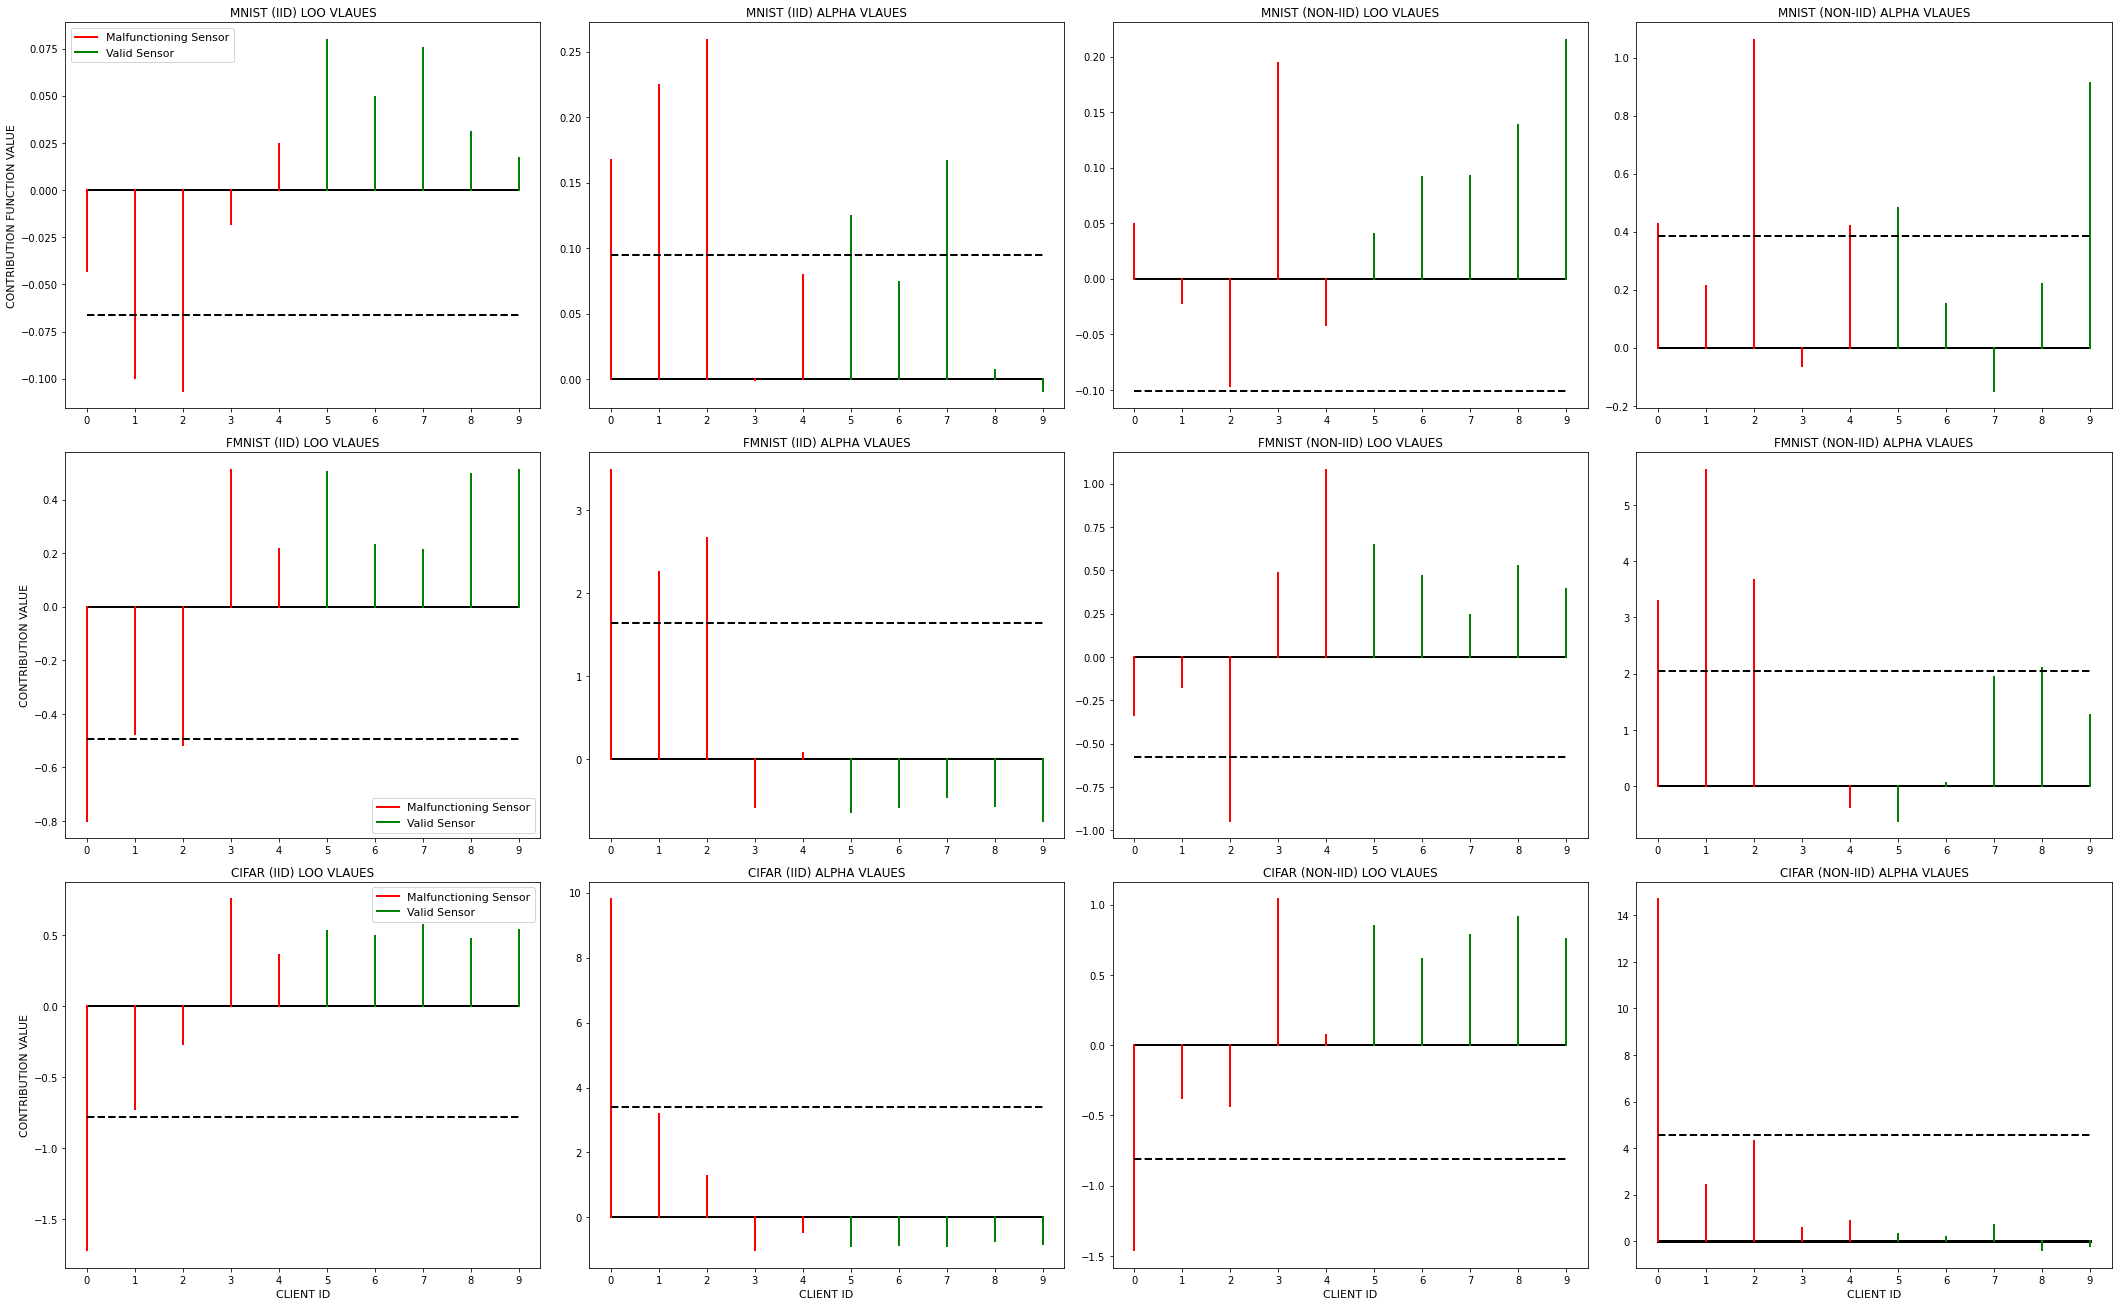

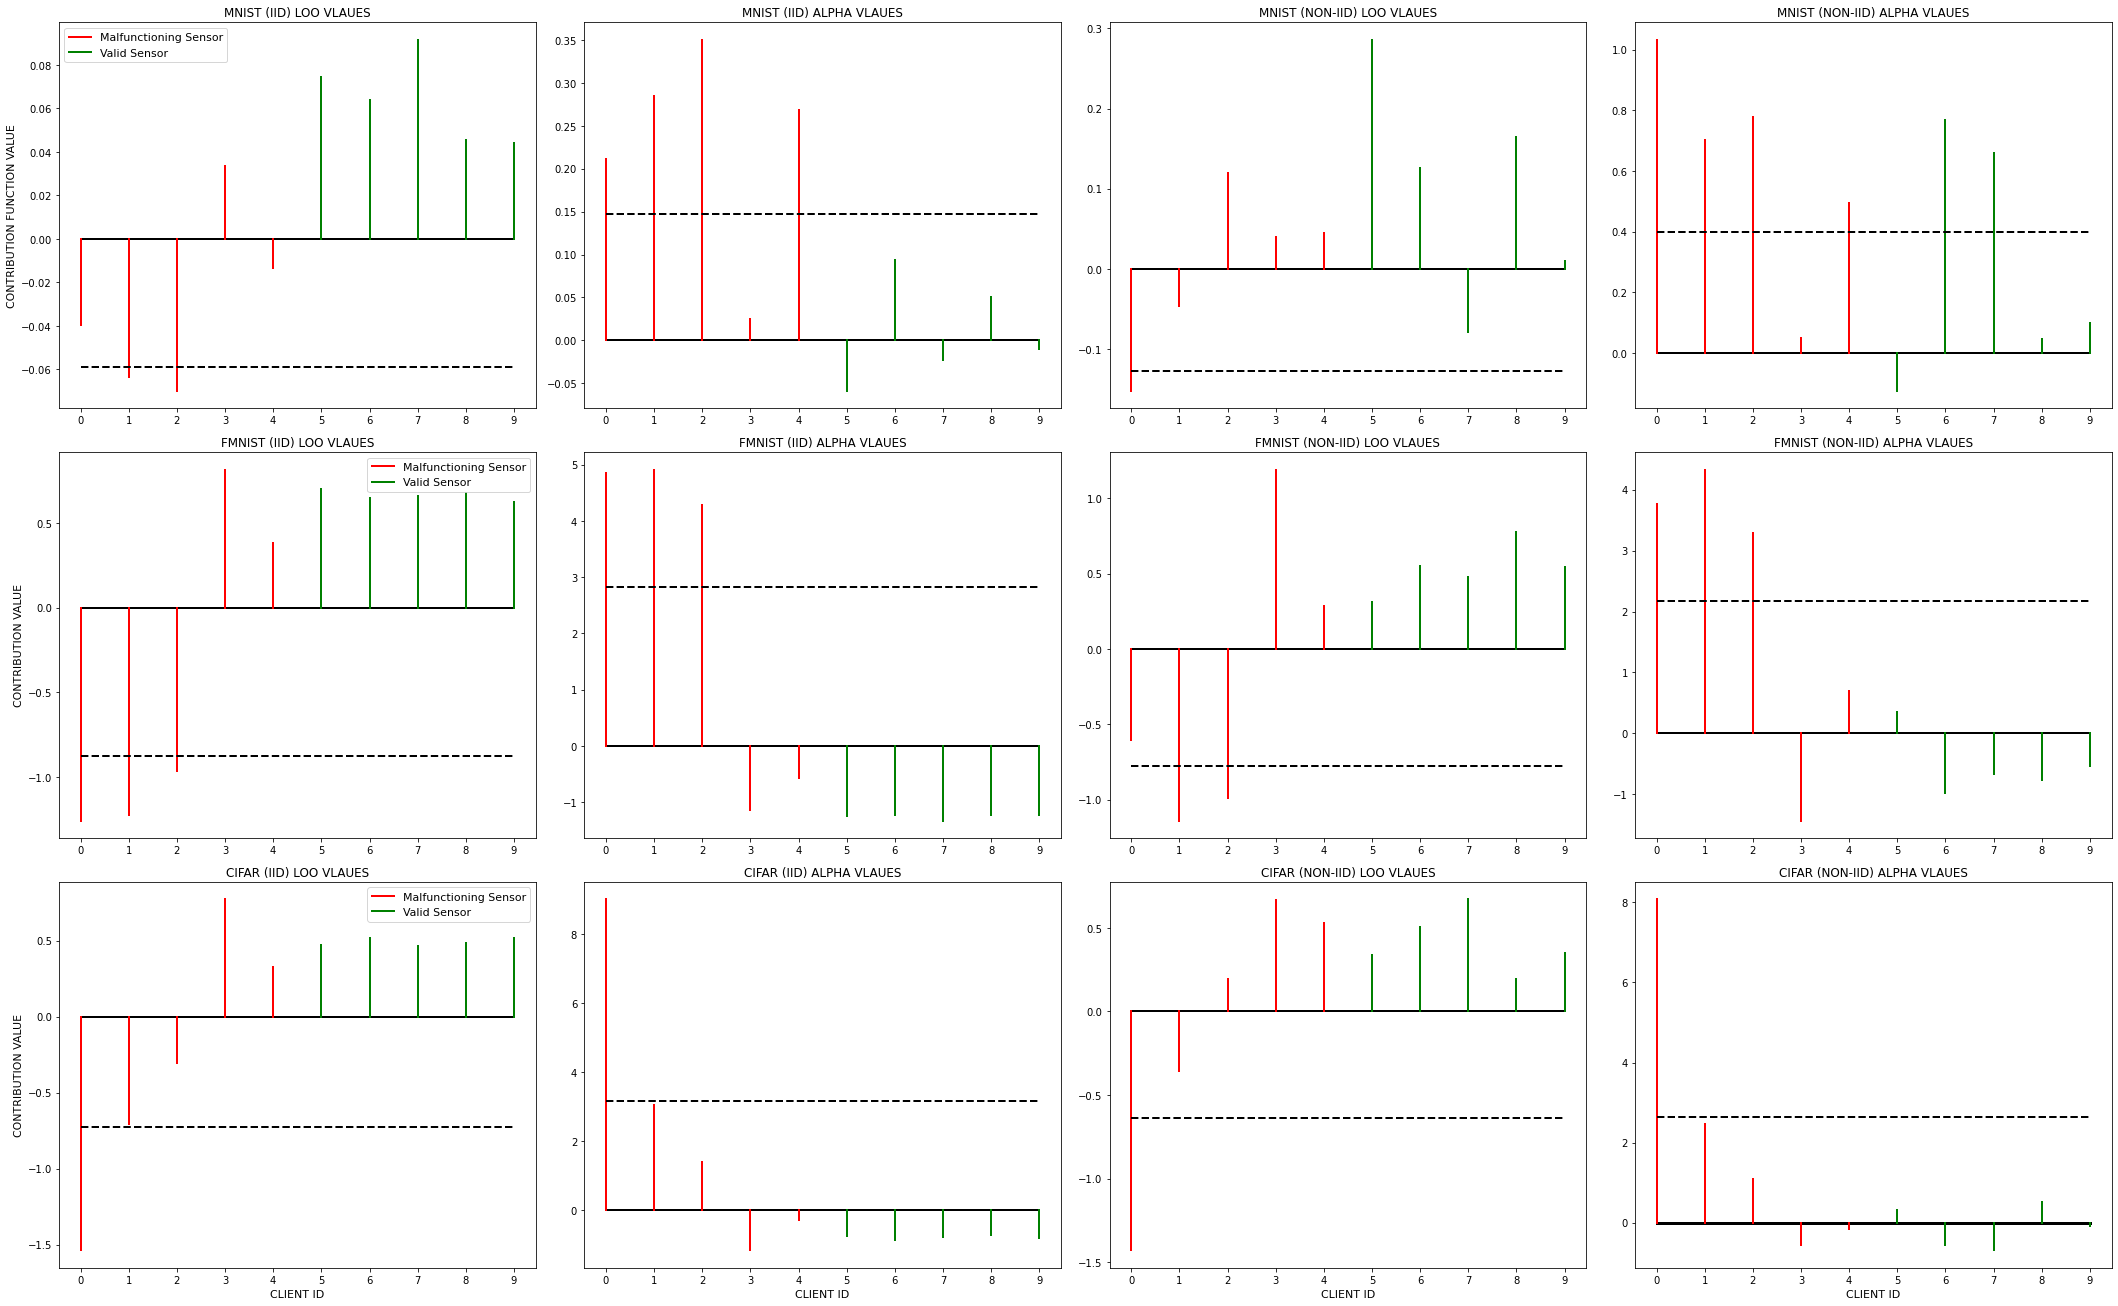

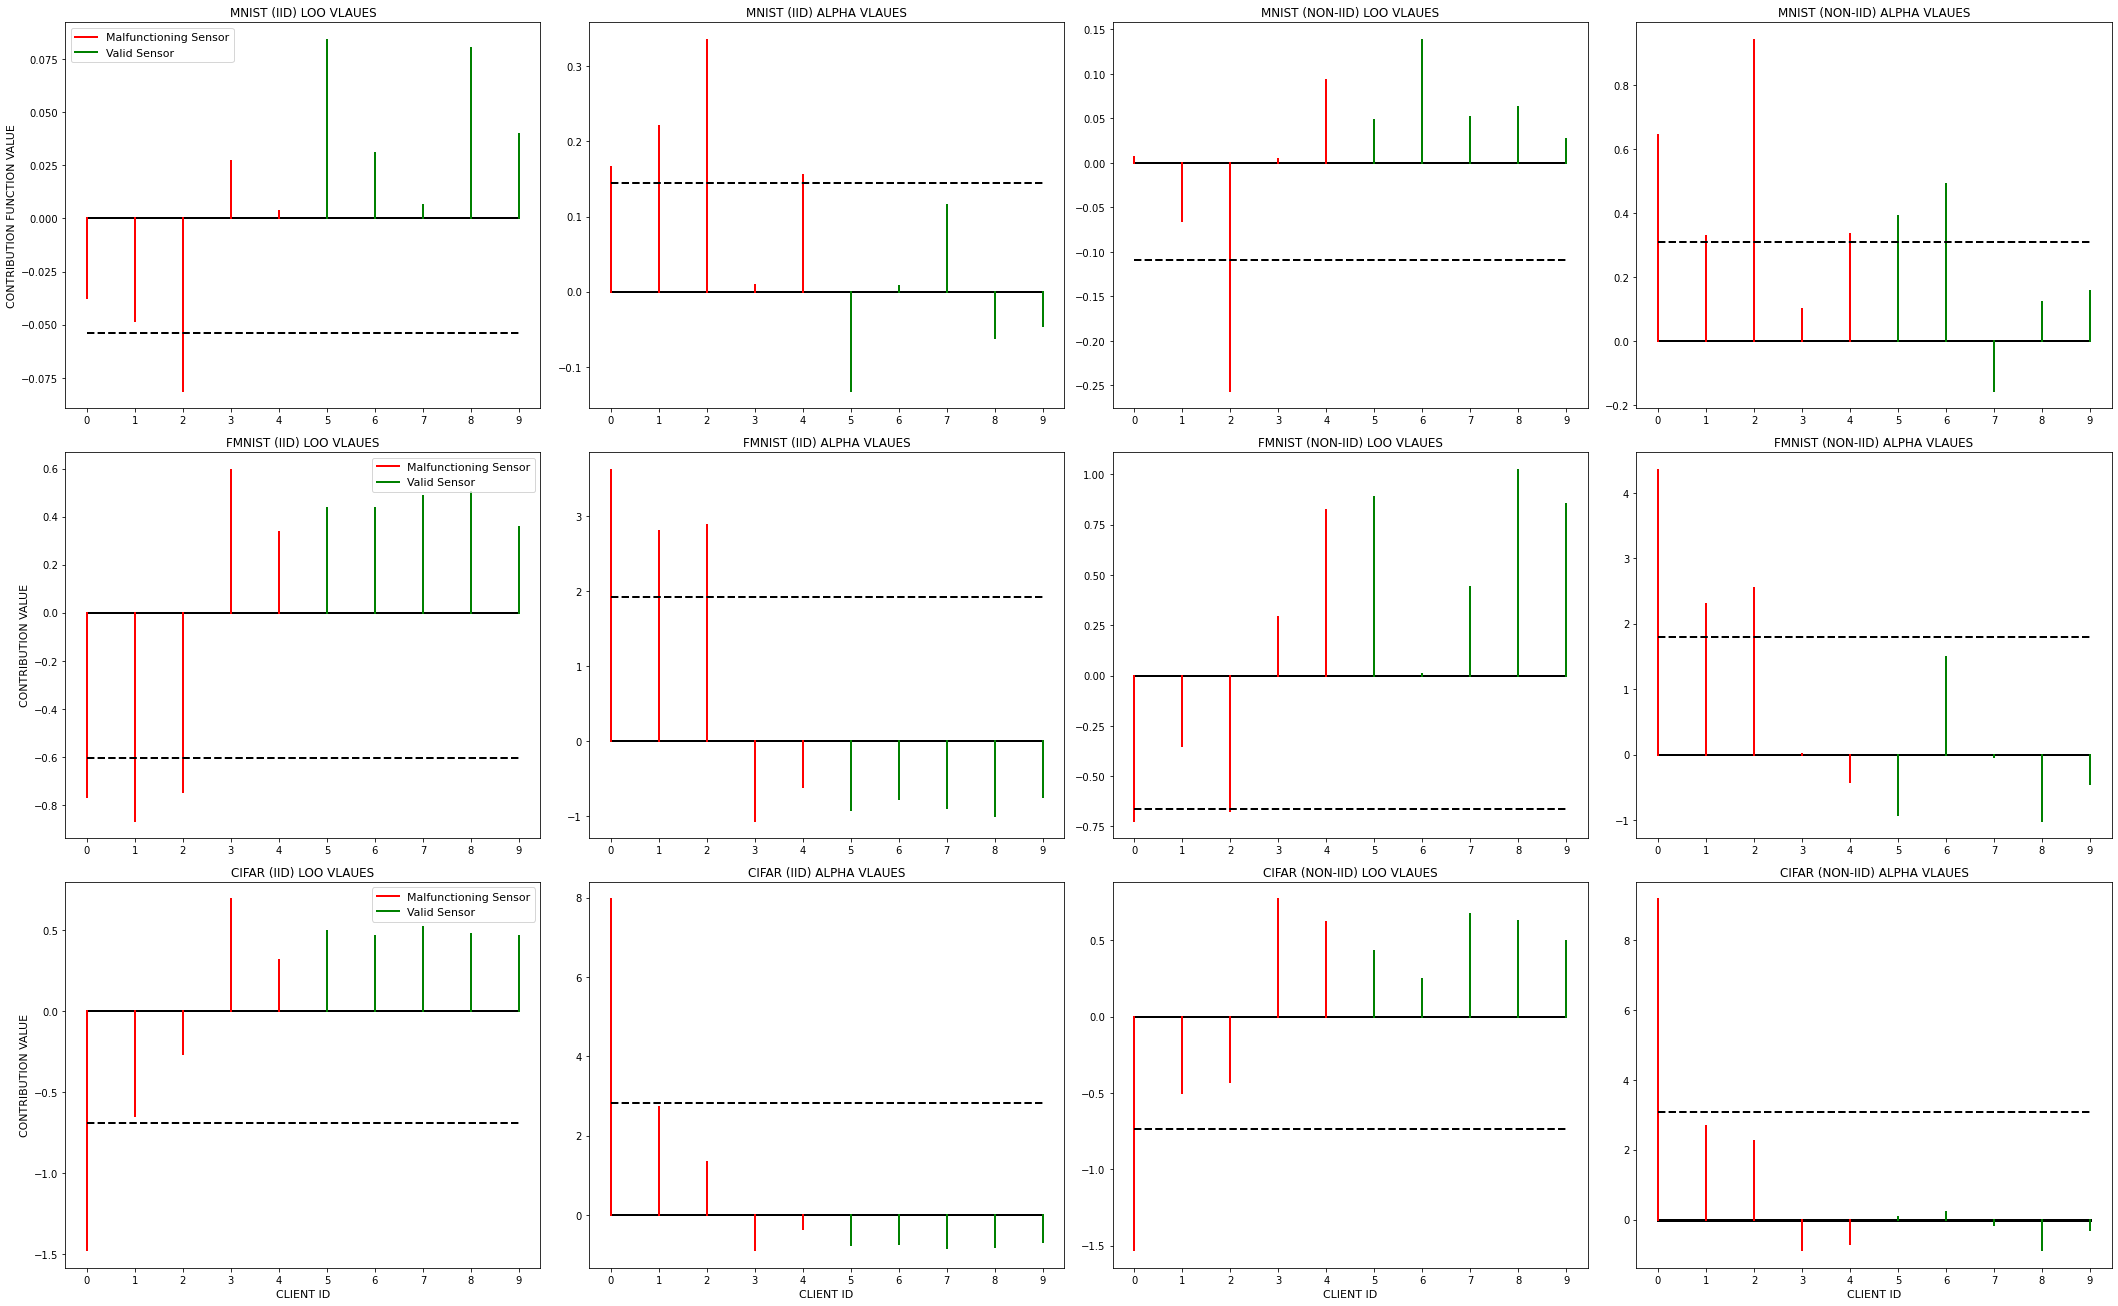

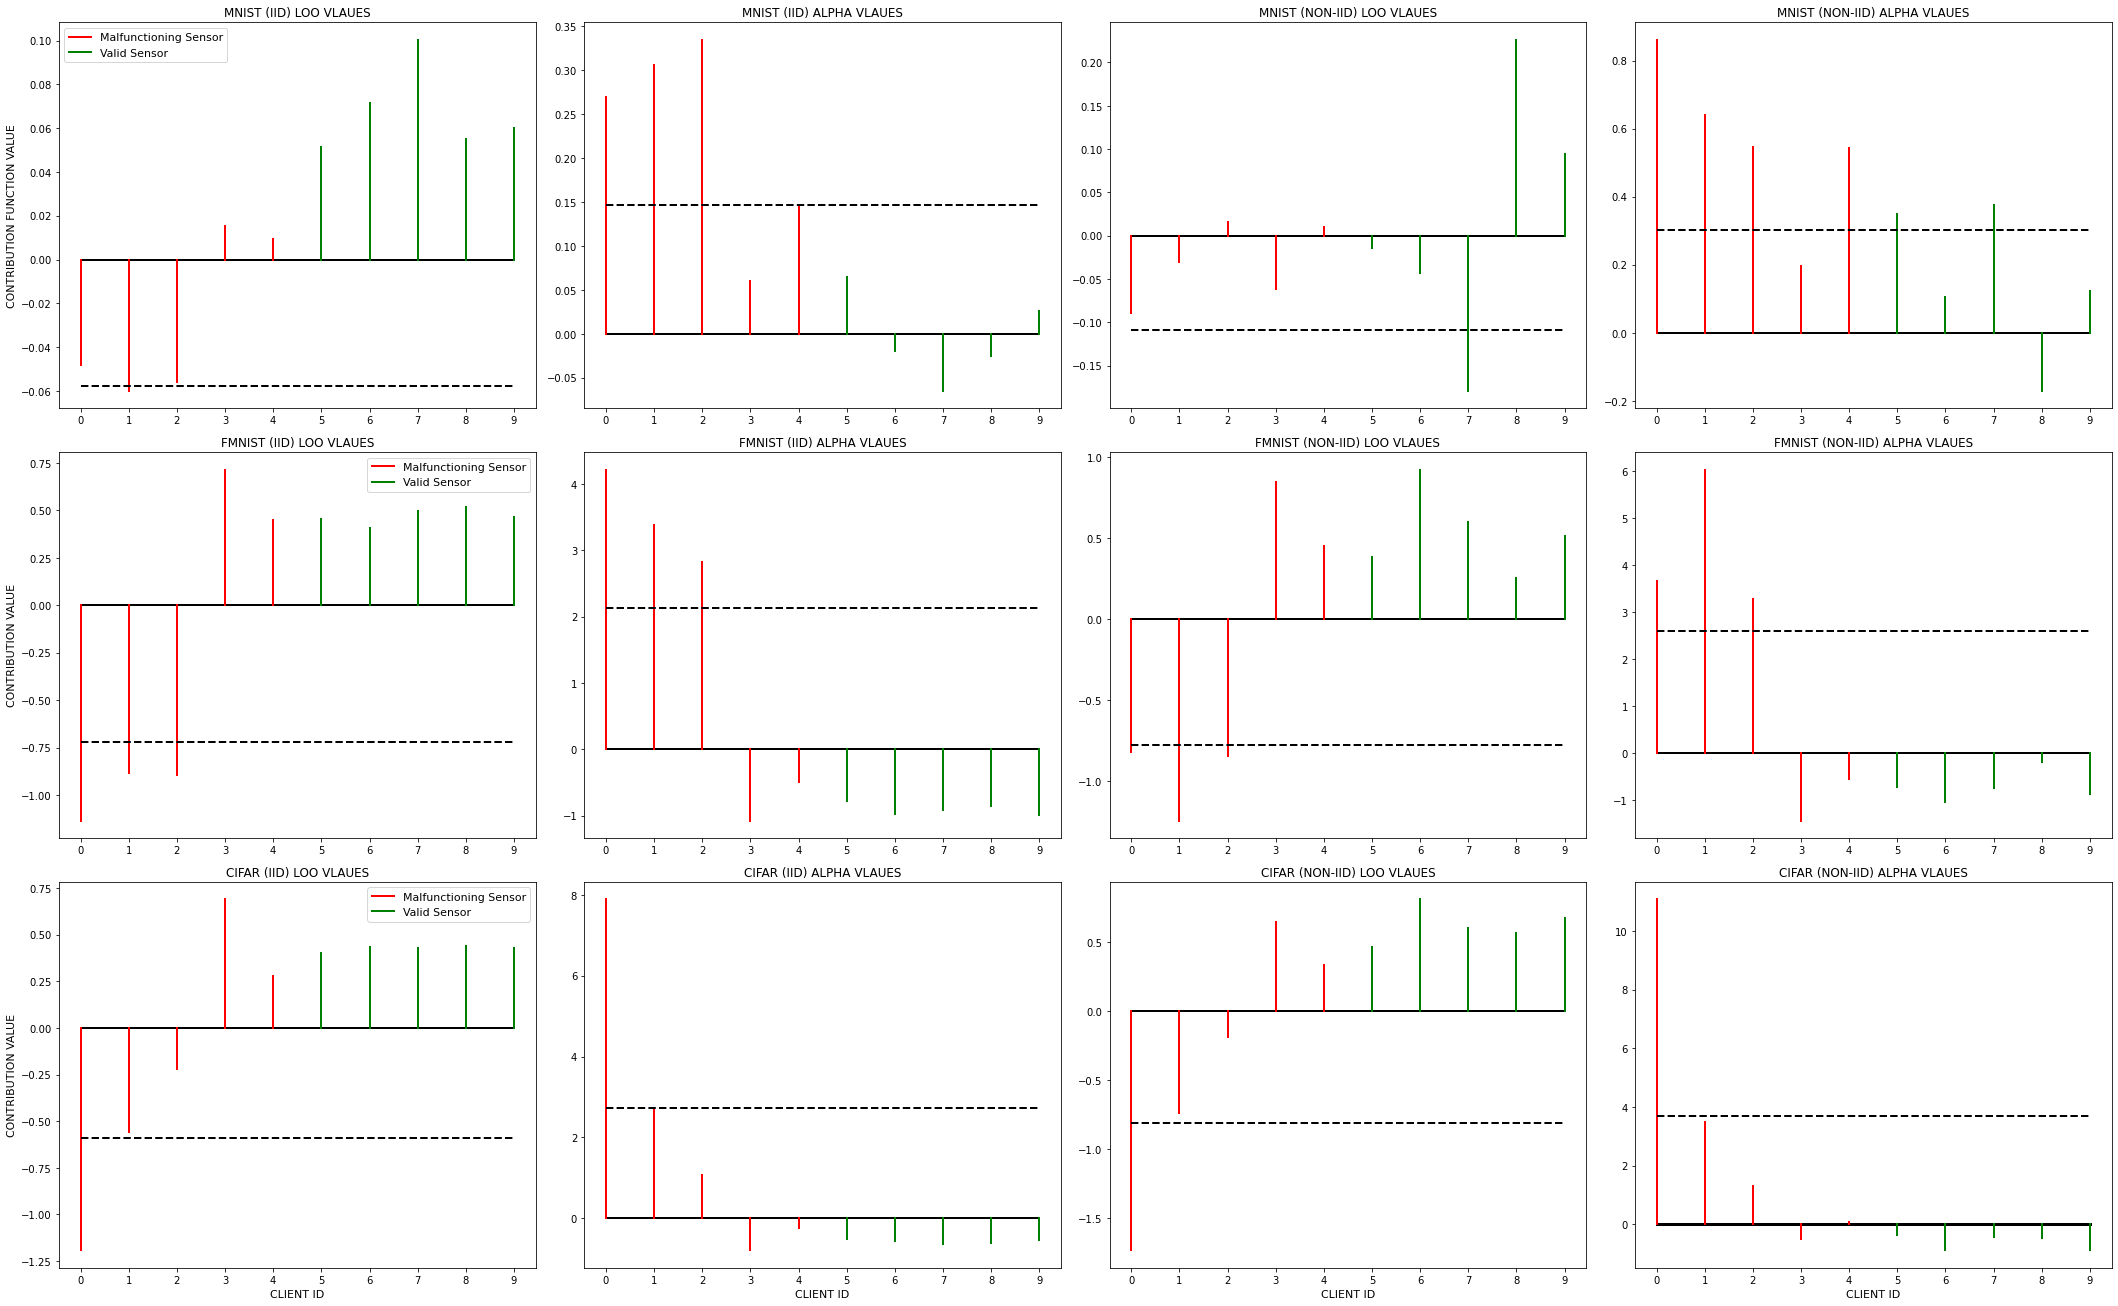

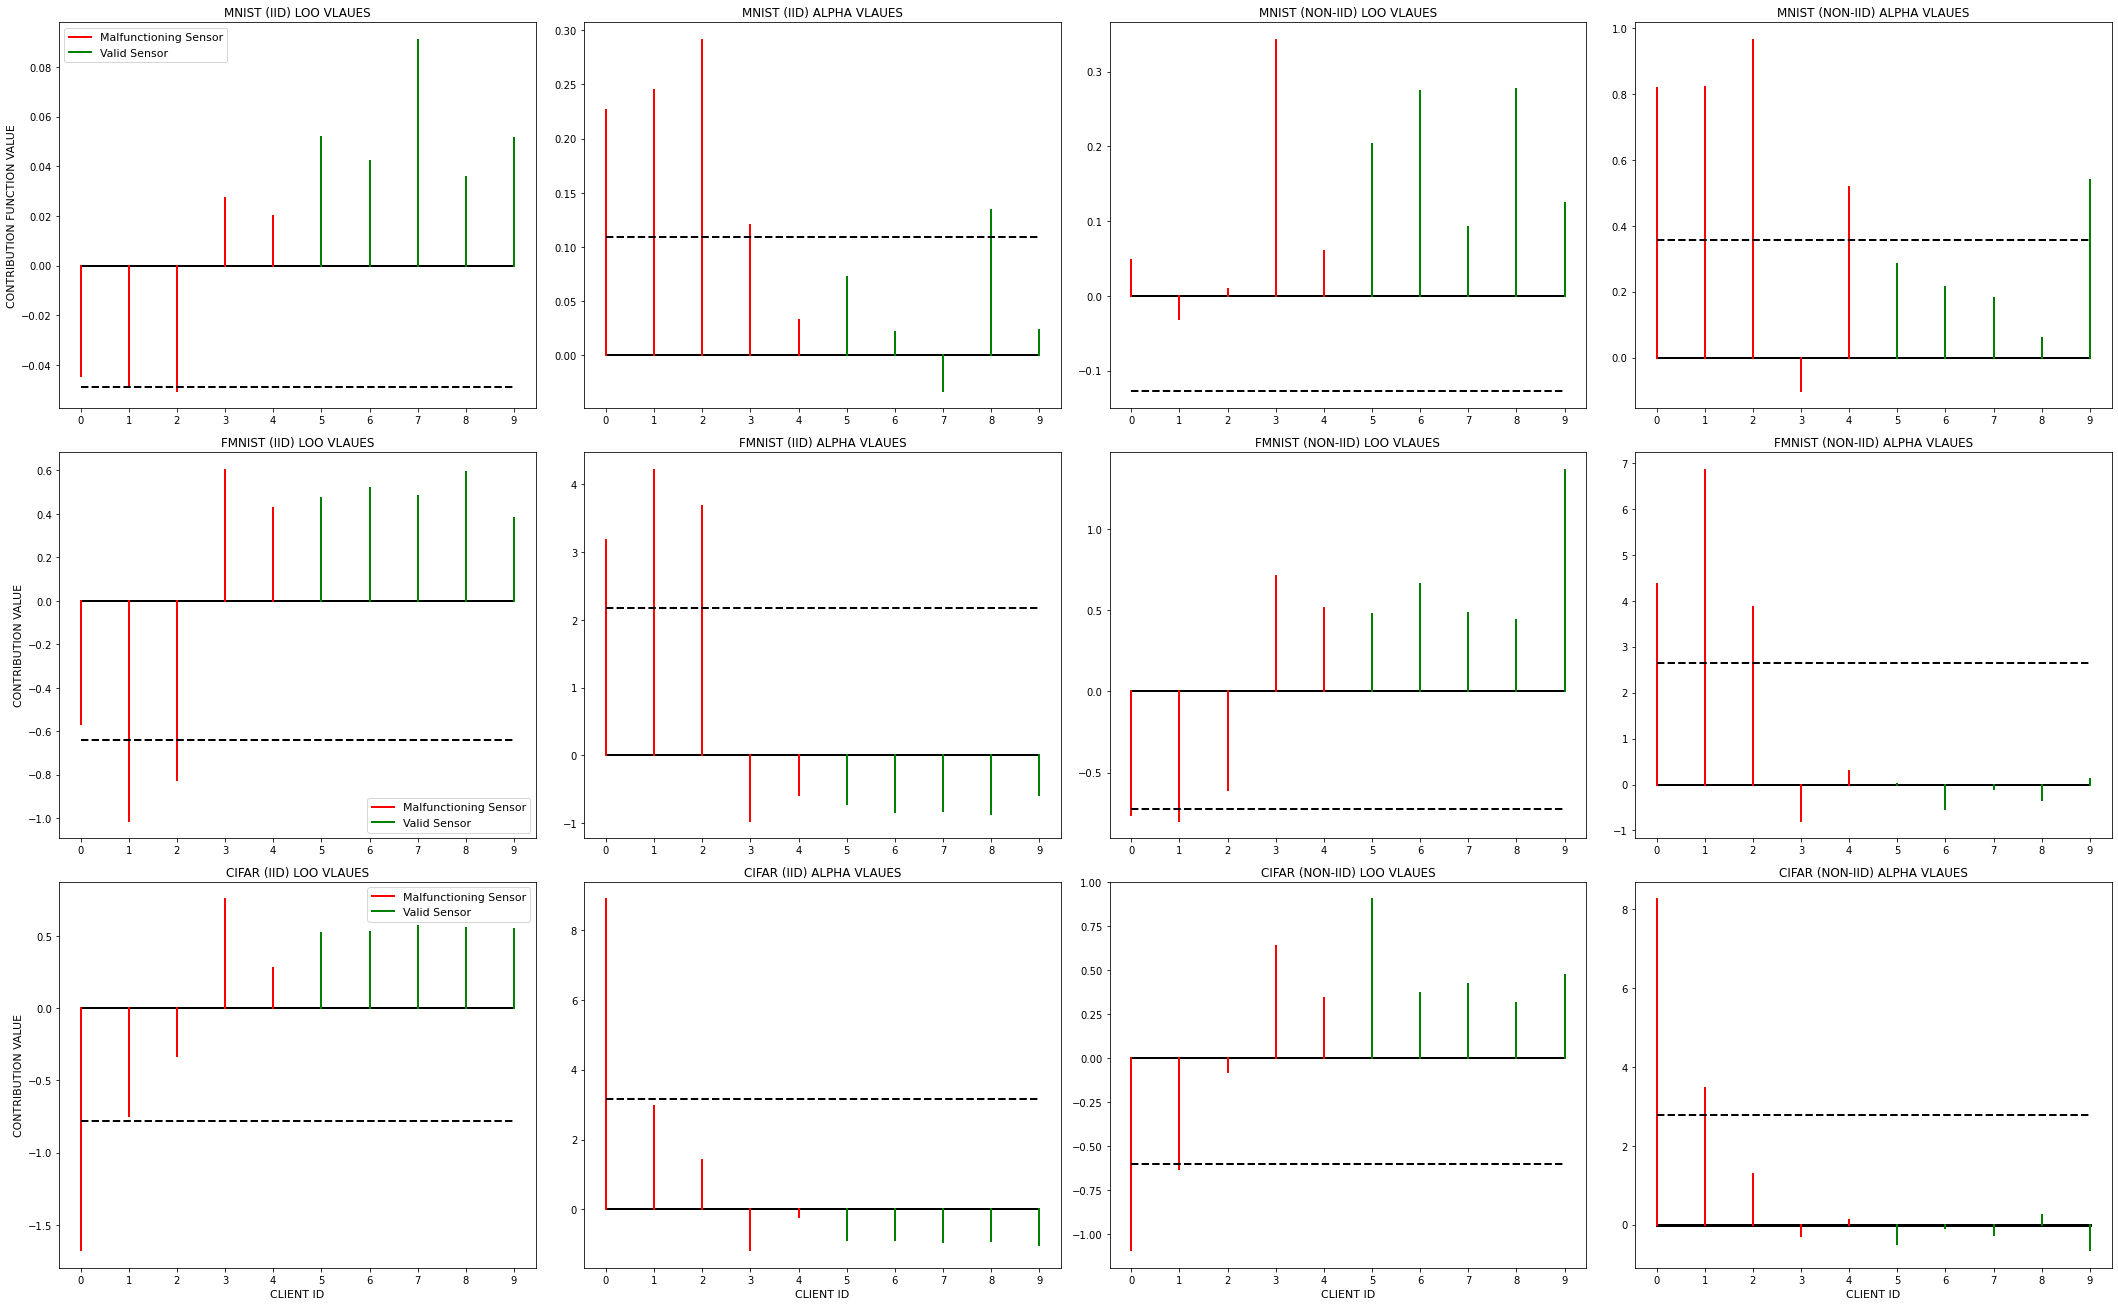

In [13]:
for run in RUNS:
    visualize_individual_scores(
        root_load = os.path.join(os.getcwd(), "Numerical_Results", run,'simulations', 'results'),
        root_save = os.path.join(os.getcwd(), "Analysis_LogFile", 'alpha_loo_comparison', 'figures'),
        prefix=run
    )
    preserve_individual_scores(
        root_load = os.path.join(os.getcwd(), "Numerical_Results", run,'simulations', 'results'),
        root_save = os.path.join(os.getcwd(), "Analysis_LogFile", 'alpha_loo_comparison', 'tables'),
        prefix=run
    )

## 2.2 ALPHA-LOO INDIVIDUAL PROGRESSION

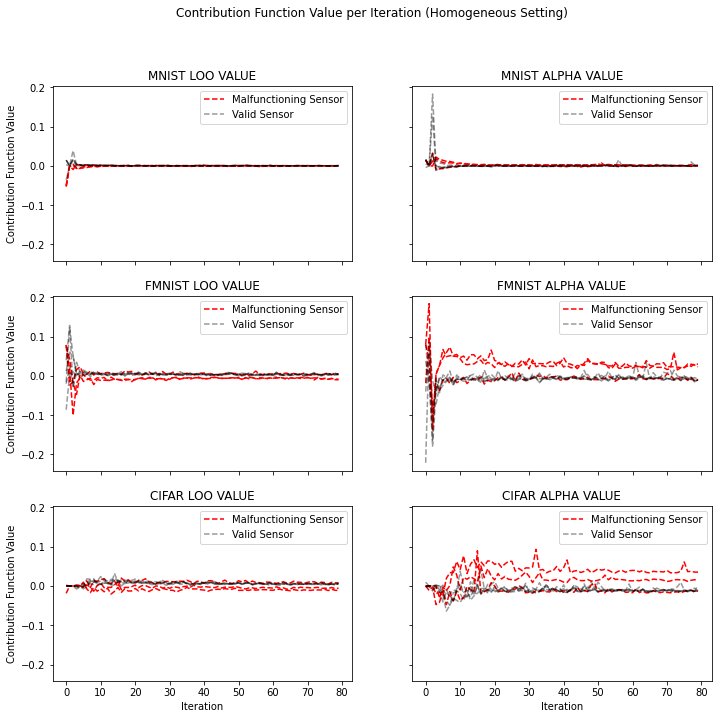

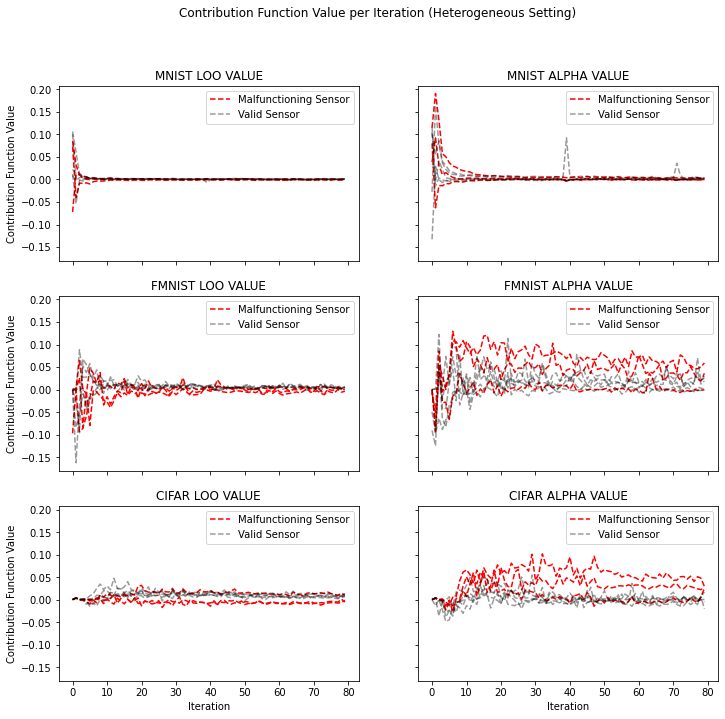

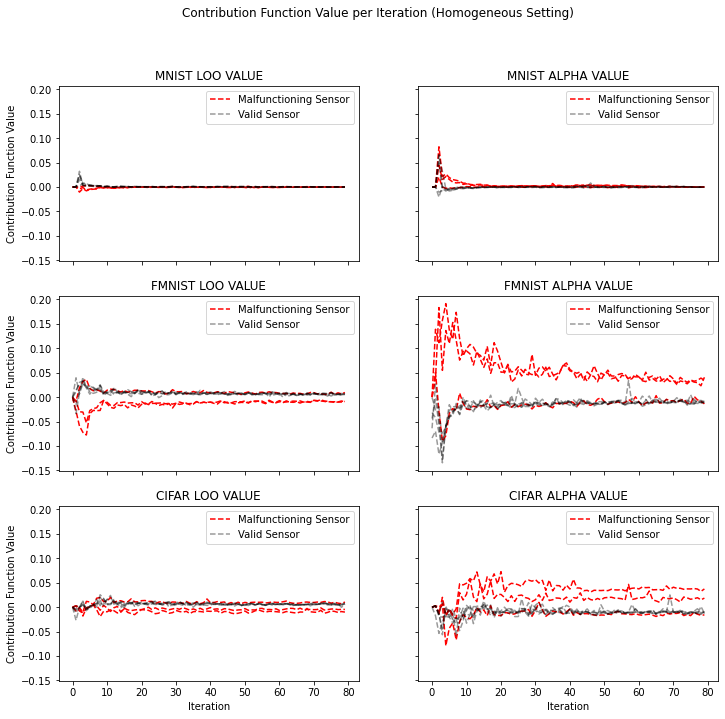

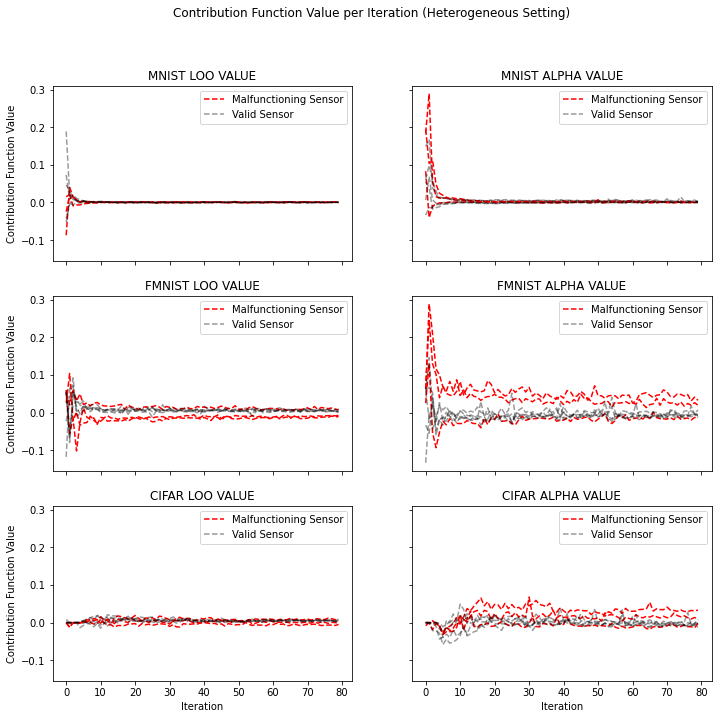

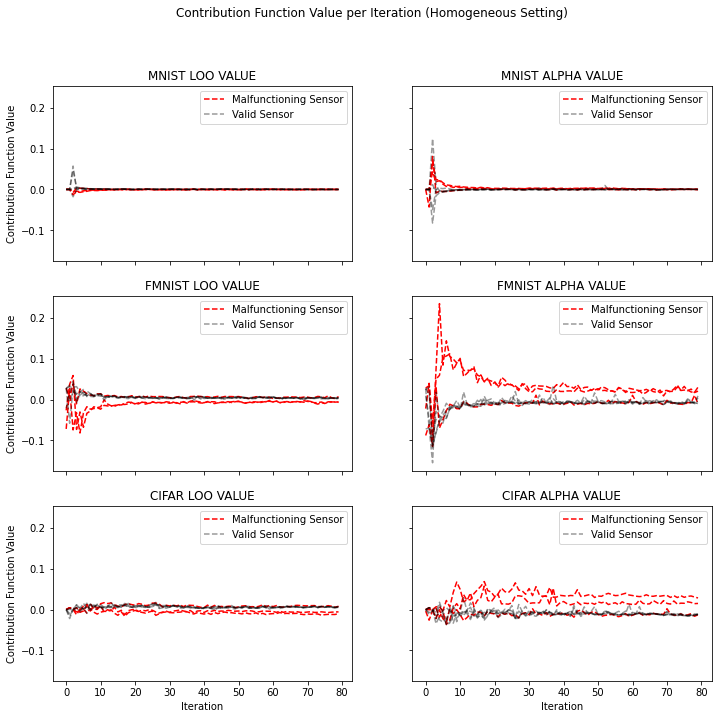

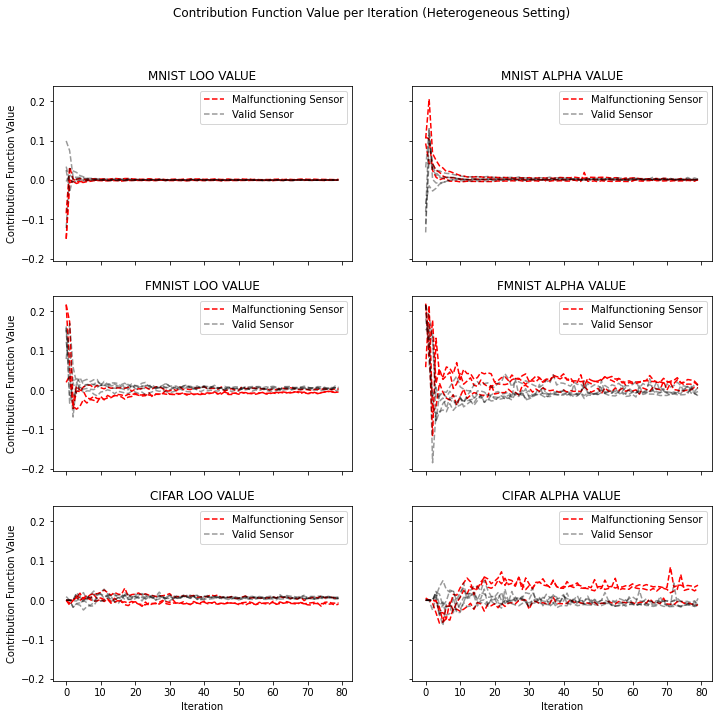

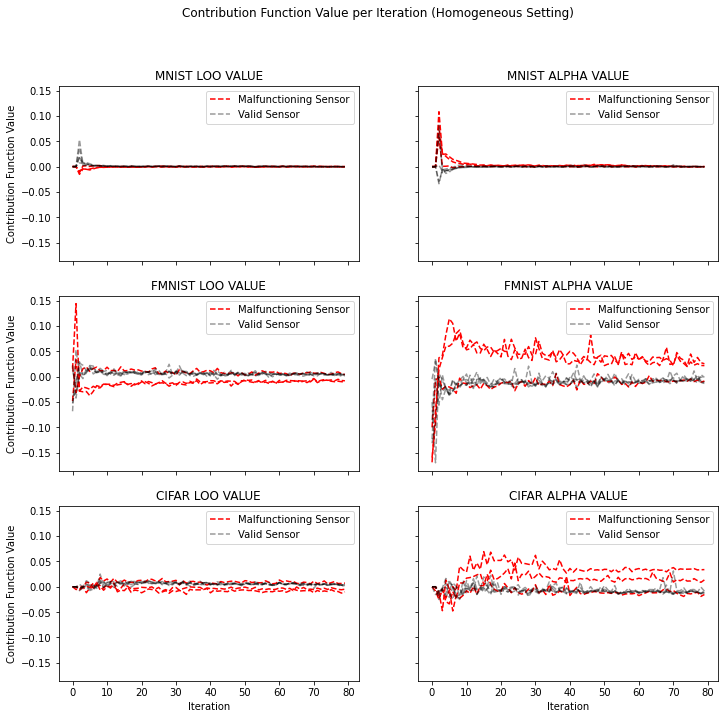

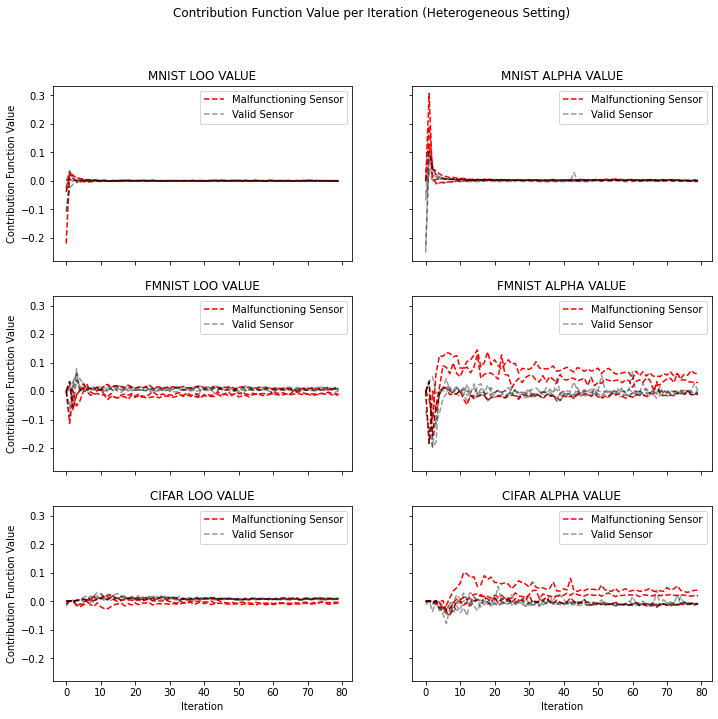

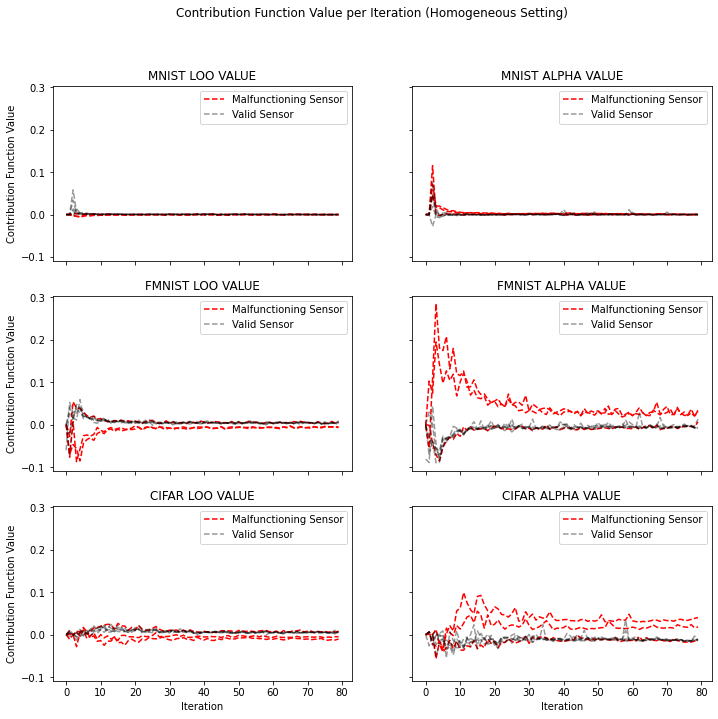

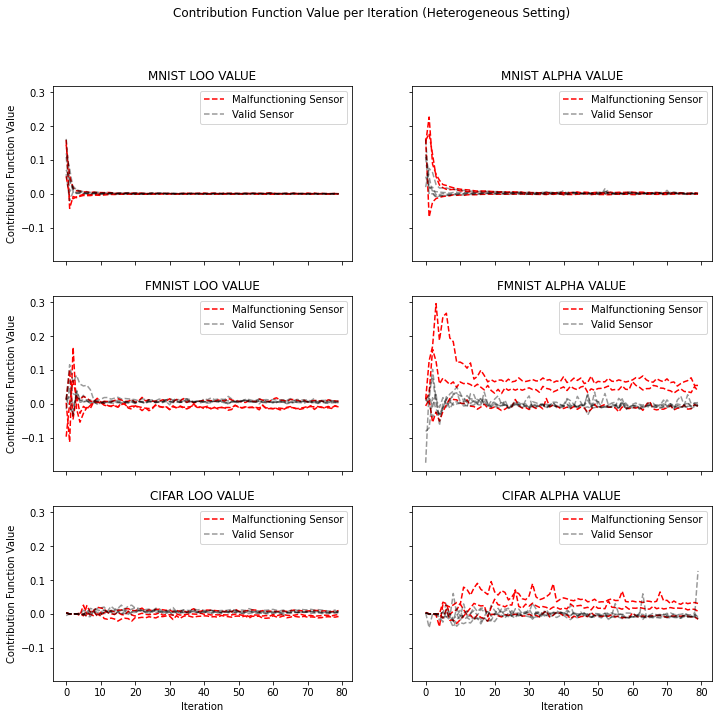

In [14]:
for run in RUNS:
    visualize_individual_progression(
        root_load = os.path.join(os.getcwd(), 'Numerical_Results', run, 'simulations', 'results'),
        root_save = os.path.join(os.getcwd(), 'Analysis_LogFile', 'alpha_loo_progression'),
        prefix=run
    )

## 2.3 INDIVIDUAL TRAINING PROGRESSION

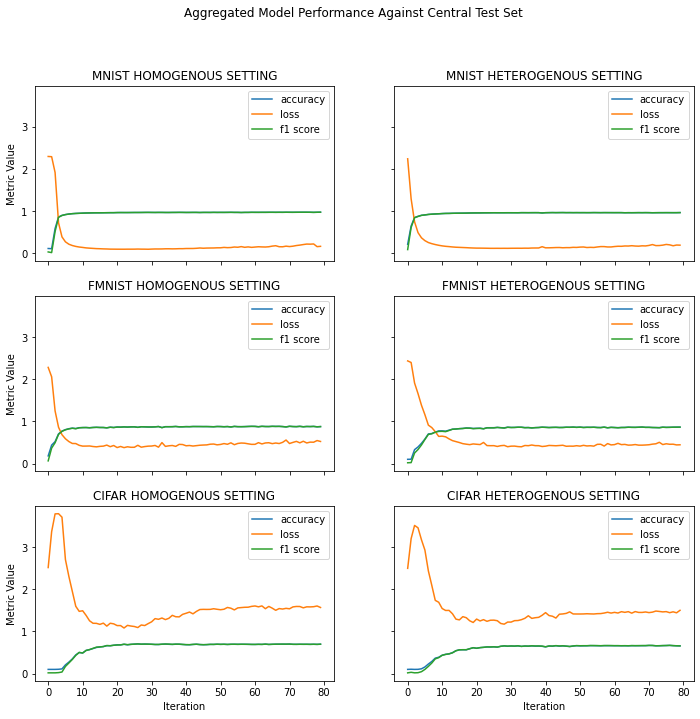

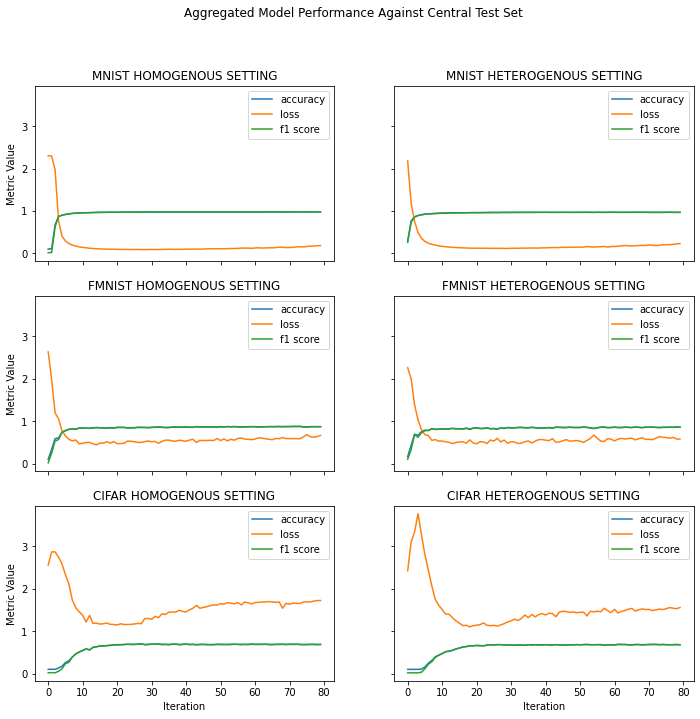

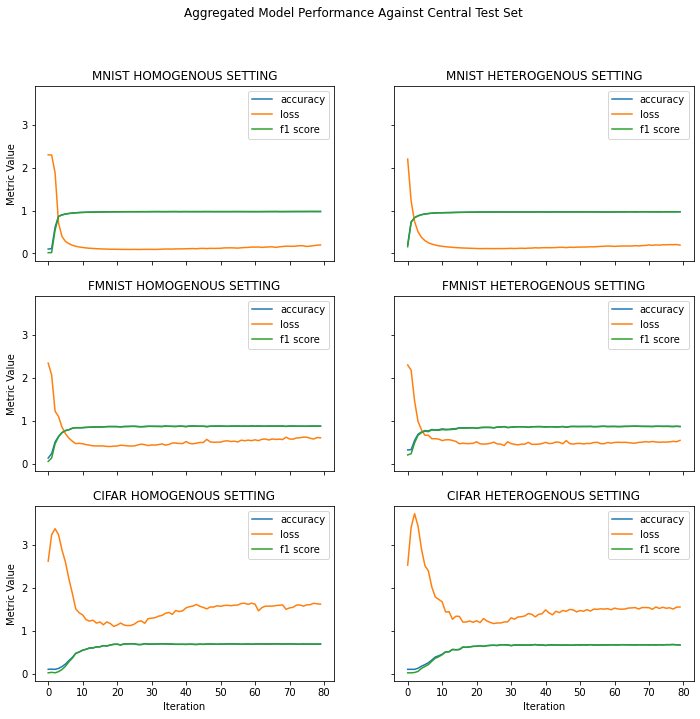

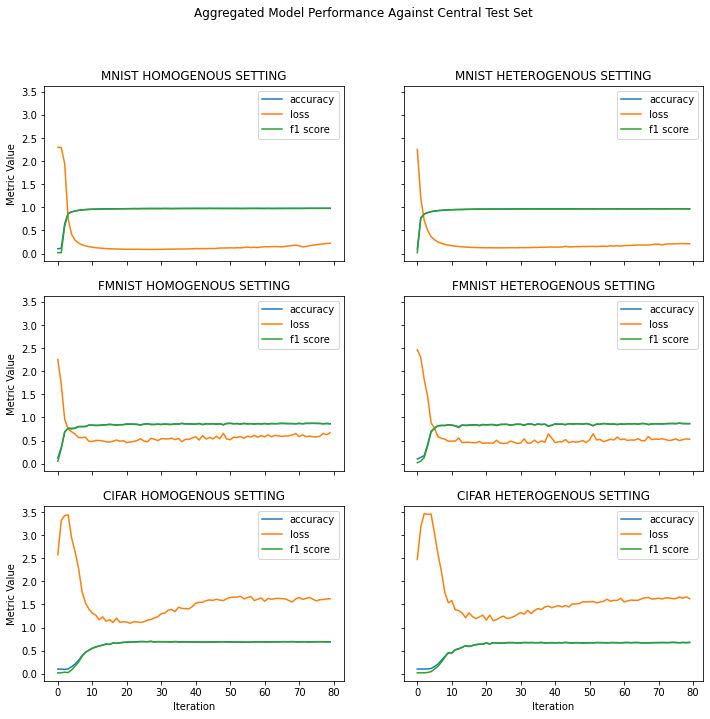

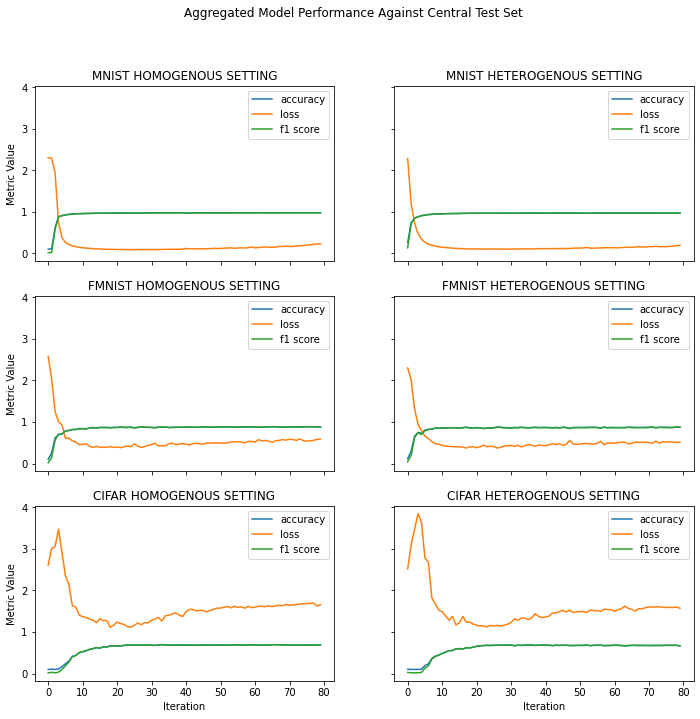

In [15]:
for run in RUNS:
    visualize_training_prog(
        root_load = os.path.join(os.getcwd(), 'Numerical_Results', run, 'simulations', 'results'),
        root_save = os.path.join(os.getcwd(), 'Analysis_LogFile', 'individual_training_progression'),
        prefix=run
    )

# 3. Datasets Information 

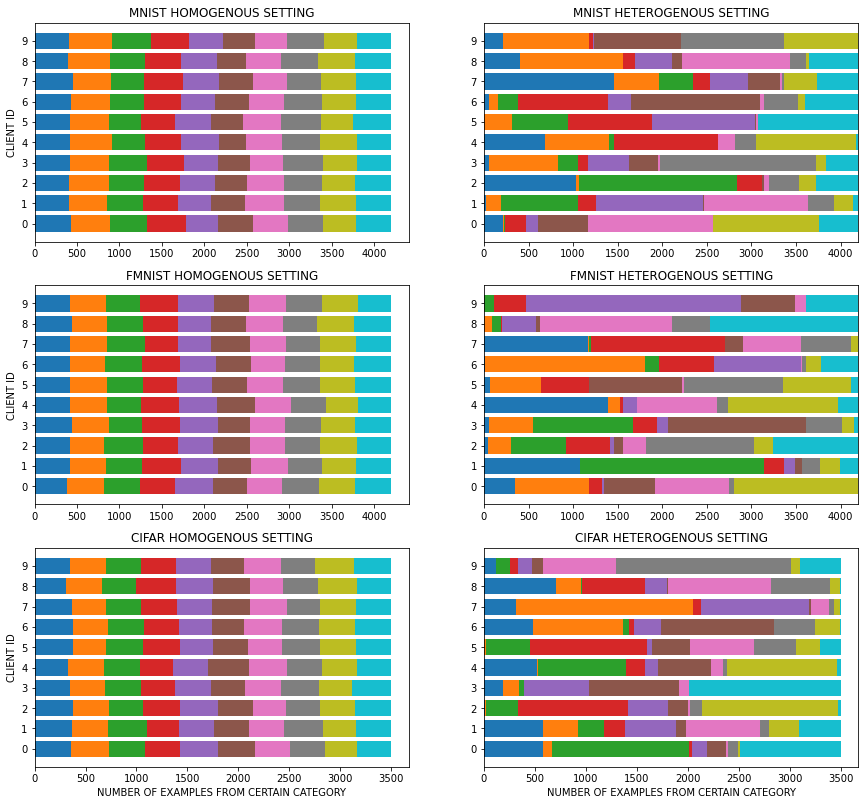

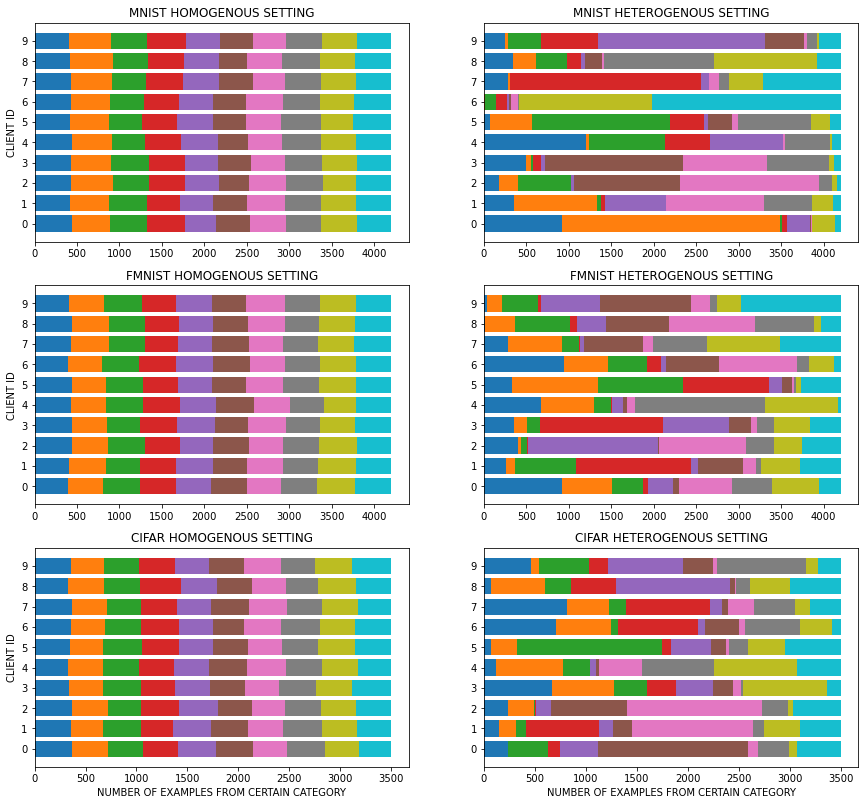

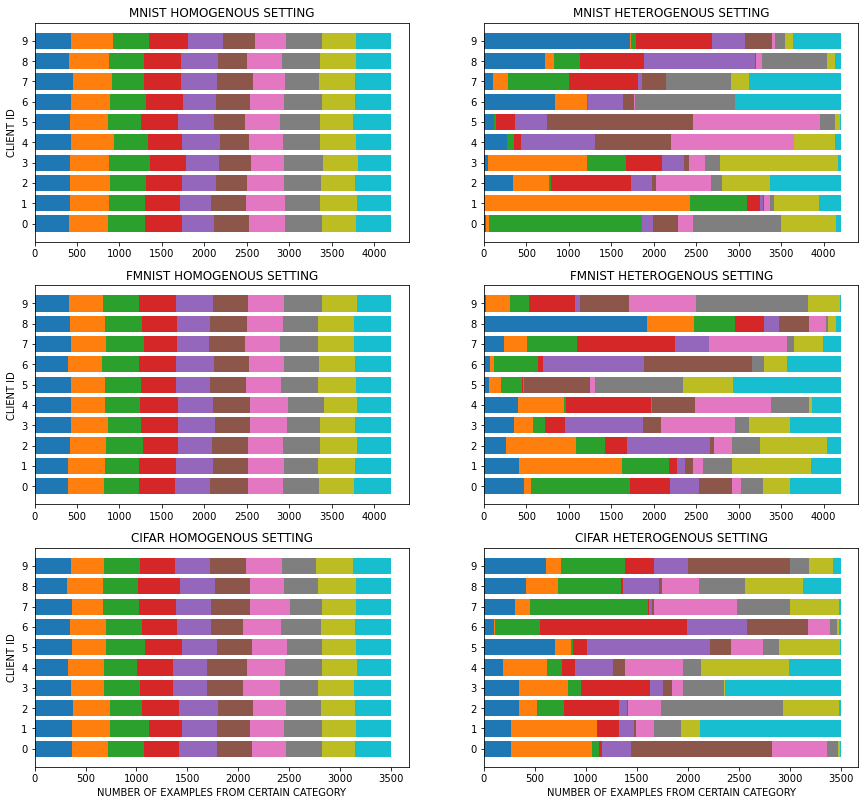

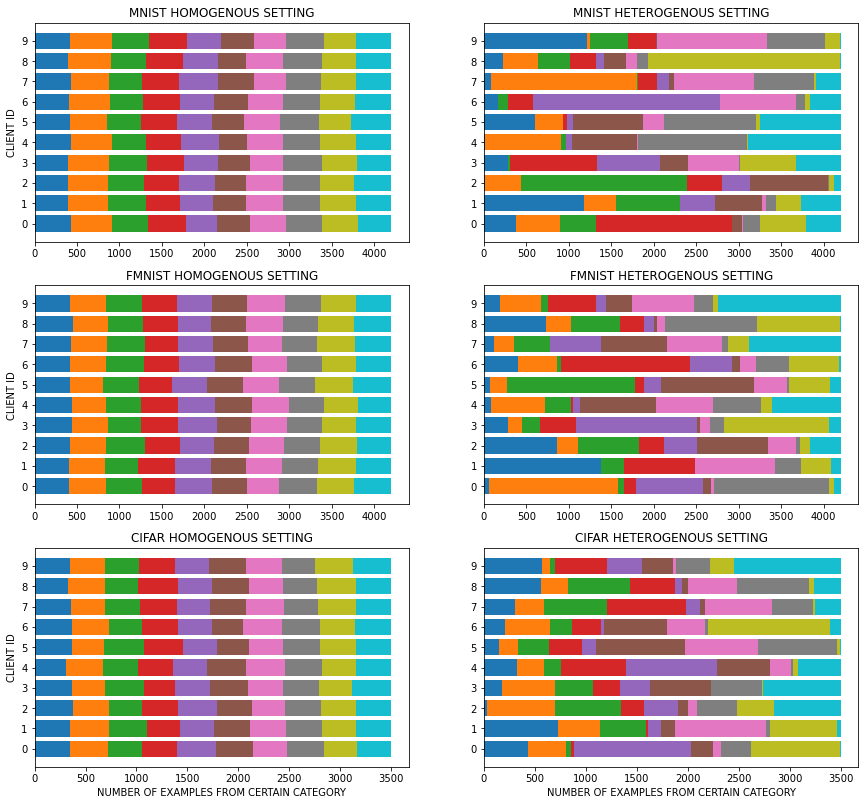

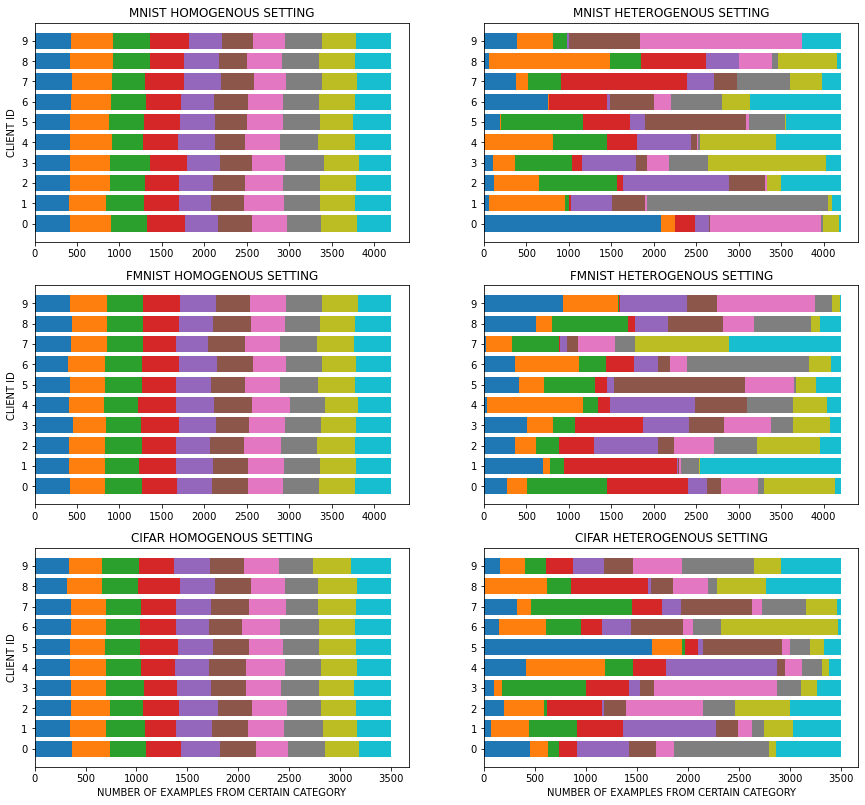

In [16]:
for run in RUNS:
    visualize_data_splits(
        root_load = os.path.join(os.getcwd(), 'Numerical_Results', run, 'datasets'),
        root_save = os.path.join(os.getcwd(), 'Analysis_LogFile', 'dataset_composition'),
        prefix=run
    )

# 4. Aggregated metrics

In [17]:
r = [f'{run} LOO' for run in RUNS]
r.extend([f'{run} ALPHA' for run in RUNS])
roots = [
    os.path.join(os.getcwd(), run, 'simulations', 'results')
    for run in RUNS
]
aggregted_frame = pd.DataFrame(index=range(10), columns=r)
aggregated_structure = {
    "mnist_hom" : aggregted_frame.copy(),
    "mnist_het" : aggregted_frame.copy(),
    "fmnist_hom" : aggregted_frame.copy(),
    "fmnist_het" : aggregted_frame.copy(),
    "cifar_hom" : aggregted_frame.copy(),
    "cifar_het" : aggregted_frame.copy()
    }
for root, prefix in zip(roots, RUNS):
    aggregated_structure['mnist_hom'][f"{prefix} LOO"] = pd.read_csv(os.path.join(os.getcwd(), 'Numerical_Results', prefix, 'simulations', 'results', f'mnist_10_hom_{prefix}', 'results', 'loo.csv')).values.T
    aggregated_structure['mnist_het'][f"{prefix} LOO"] = pd.read_csv(os.path.join(os.getcwd(), 'Numerical_Results', prefix, 'simulations', 'results', f'mnist_10_het_{prefix}', 'results', 'loo.csv')).values.T
    aggregated_structure['fmnist_hom'][f"{prefix} LOO"] = pd.read_csv(os.path.join(os.getcwd(), 'Numerical_Results', prefix, 'simulations', 'results', f'fmnist_10_hom_{prefix}', 'results', 'loo.csv')).values.T
    aggregated_structure['fmnist_het'][f"{prefix} LOO"] = pd.read_csv(os.path.join(os.getcwd(), 'Numerical_Results', prefix, 'simulations', 'results', f'fmnist_10_het_{prefix}', 'results', 'loo.csv')).values.T
    aggregated_structure['cifar_hom'][f"{prefix} LOO"] = pd.read_csv(os.path.join(os.getcwd(), 'Numerical_Results', prefix, 'simulations', 'results', f'cifar_10_hom_{prefix}', 'results', 'loo.csv')).values.T
    aggregated_structure['cifar_het'][f"{prefix} LOO"] = pd.read_csv(os.path.join(os.getcwd(), 'Numerical_Results', prefix, 'simulations', 'results', f'cifar_10_het_{prefix}', 'results', 'loo.csv')).values.T
    
    aggregated_structure['mnist_hom'][f"{prefix} ALPHA"] = pd.read_csv(os.path.join(os.getcwd(), 'Numerical_Results', prefix, 'simulations', 'results', f'mnist_10_hom_{prefix}', 'results', 'alpha.csv')).values.T
    aggregated_structure['mnist_het'][f"{prefix} ALPHA"] = pd.read_csv(os.path.join(os.getcwd(), 'Numerical_Results', prefix, 'simulations', 'results', f'mnist_10_het_{prefix}', 'results', 'alpha.csv')).values.T
    aggregated_structure['fmnist_hom'][f"{prefix} ALPHA"] = pd.read_csv(os.path.join(os.getcwd(), 'Numerical_Results', prefix, 'simulations', 'results', f'fmnist_10_hom_{prefix}', 'results', 'alpha.csv')).values.T
    aggregated_structure['fmnist_het'][f"{prefix} ALPHA"] = pd.read_csv(os.path.join(os.getcwd(), 'Numerical_Results', prefix, 'simulations', 'results', f'fmnist_10_het_{prefix}', 'results', 'alpha.csv')).values.T
    aggregated_structure['cifar_hom'][f"{prefix} ALPHA"] = pd.read_csv(os.path.join(os.getcwd(), 'Numerical_Results', prefix, 'simulations', 'results', f'cifar_10_hom_{prefix}', 'results', 'alpha.csv')).values.T
    aggregated_structure['cifar_het'][f"{prefix} ALPHA"] = pd.read_csv(os.path.join(os.getcwd(), 'Numerical_Results', prefix, 'simulations', 'results', f'cifar_10_het_{prefix}', 'results', 'alpha.csv')).values.T

In [18]:
# LOADING FRAMES
data_struct = {
"mnist_hom" : {
    "loo": aggregated_structure['mnist_hom'][['I LOO', 'II LOO', 'III LOO', 'IV LOO', 'V LOO']].mean(axis=1),
    "alpha": aggregated_structure['mnist_hom'][['I ALPHA', 'II ALPHA', 'III ALPHA', 'IV ALPHA', 'V ALPHA']].mean(axis=1)
    },
"mnist_het" : {
    "loo": aggregated_structure['mnist_het'][['I LOO', 'II LOO', 'III LOO', 'IV LOO', 'V LOO']].mean(axis=1),
    "alpha": aggregated_structure['mnist_het'][['I ALPHA', 'II ALPHA', 'III ALPHA', 'IV ALPHA', 'V ALPHA']].mean(axis=1)
    },
"fmnist_hom" : {
    "loo": aggregated_structure['fmnist_hom'][['I LOO', 'II LOO', 'III LOO', 'IV LOO', 'V LOO']].mean(axis=1),
    "alpha": aggregated_structure['fmnist_hom'][['I ALPHA', 'II ALPHA', 'III ALPHA', 'IV ALPHA', 'V ALPHA']].mean(axis=1)
    },
"fmnist_het" : {
    "loo": aggregated_structure['fmnist_het'][['I LOO', 'II LOO', 'III LOO', 'IV LOO', 'V LOO']].mean(axis=1),
    "alpha": aggregated_structure['fmnist_het'][['I ALPHA', 'II ALPHA', 'III ALPHA', 'IV ALPHA', 'V ALPHA']].mean(axis=1)
    },
"cifar_hom" : { 
    "loo": aggregated_structure['cifar_hom'][['I LOO', 'II LOO', 'III LOO', 'IV LOO', 'V LOO']].mean(axis=1),
    "alpha": aggregated_structure['cifar_hom'][['I ALPHA', 'II ALPHA', 'III ALPHA', 'IV ALPHA', 'V ALPHA']].mean(axis=1)
    },
"cifar_het" : { 
    "loo": aggregated_structure['cifar_het'][['I LOO', 'II LOO', 'III LOO', 'IV LOO', 'V LOO']].mean(axis=1),
    "alpha": aggregated_structure['cifar_het'][['I ALPHA', 'II ALPHA', 'III ALPHA', 'IV ALPHA', 'V ALPHA']].mean(axis=1)
    }}

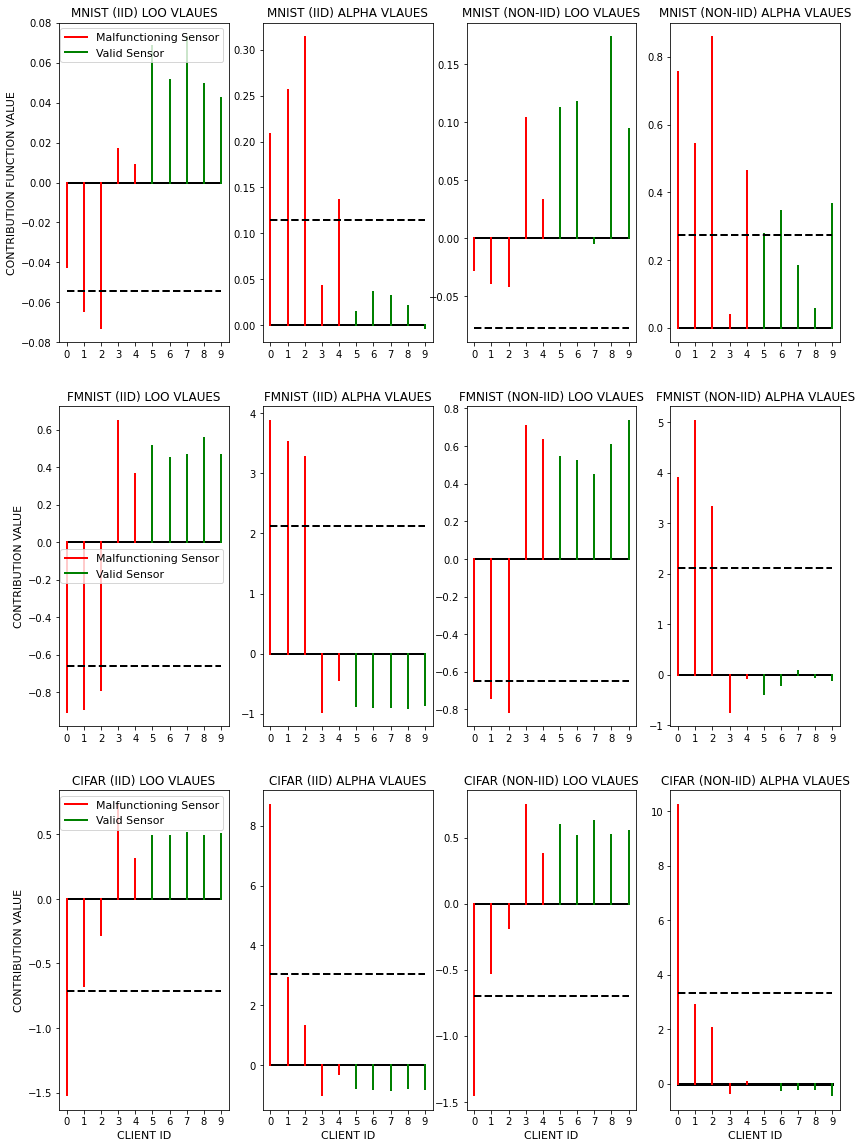

In [19]:
visualize_aggregated_scores(
    data_struct=data_struct,
    root_save=os.path.join(os.getcwd(), 'Analysis_LogFile', 'alpha_loo_aggregated')
)

In [20]:
preserve_individual_scores_from_struct(
    data_struct=data_struct,
    root_save=(os.getcwd(), 'Analysis_LogFile', 'alpha_loo_aggregated')
)

TypeError: expected str, bytes or os.PathLike object, not tuple